# **HCI Credit Score Modeling**
Created by [Farin Cyntiya Garini](https://www.linkedin.com/in/farin-cyntiya-garini/)

<center><img src="https://i.postimg.cc/WbD4pbPK/home-credit-indonesia-credit-score-modeling.png"></center>

Home Credit uses various statistical methods and Machine Learning to make credit score predictions. Unlocking the maximum potential of Home Credit Indonesia's data can be done by creating a model that ensures customers who can make repayments are not rejected when applying for loans. Additionally, Home Credit can provide loans with principal, maturity, and repayment calendars that will motivate clients to succeed.

<center><img src="https://i.postimg.cc/Ls8jH80x/CRISP-DM.png"></center>

Source: [medium.com](https://quyenntk143.medium.com/problem-solving-framework-crisp-1decbb25a42c)

By using the **CRISP-DM method**, we'll build **Logistic Regression, K-Nearest Neighbor (KNN), and Random Forest** models and compare which one best predicted the credit score.

---
## **1. Business Understanding**

### Problem Statement
A credit score is a number from 300 to 850 that depicts a **consumer’s creditworthiness.** Creditworthiness is how a lender determines that people will default on their debt obligations or how worthy people are to receive new credit. Creditworthiness is what lenders look at before approving any new credit to prospective borrowers. A credit score plays a key role in a lender’s decision to offer credit. **The higher the score, the better a borrower looks to potential lenders.**

A credit score is based on credit history: number of open accounts, total levels of debt, repayment history, and other factors. Lenders use credit scores to evaluate the probability that an individual will repay loans in a timely manner.


### Business Metric and Objectives
Factors considered in credit scoring include repayment history, types of loans, length of credit history, and an individual’s total debt. These factors can be used in building a model to predict the capabilities of each applicant in repaying the loan (credit score). Once the credit score prediction model is made, the model is evaluated by the metrics; Accuracy, Precision, Recall, F1-score, and AUC.

### Model Definition
The model created is to predict credit scores using datasets provided by Home Credit Indonesia consisting of 8 primary data, such as application_train, application_test, bureau, bureau_balance, previous_application, POS_CASH_balance, installments_payments, and credit_card_balance. 


---
## **2. Data Understanding**

### Context
In this modeling process, a target variable consisting of numbers 1 and 0 is used, where 1 indicates a client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample and 0 for all other cases.

### Content
The datasets used for this modeling process have rows representing a client and columns containing the attributes. The dataset includes information about the clients, their credit information and status. The following are the descriptions of each dataset provided by Home Credit Indonesia.

● **application_{train|test}.csv**
> This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).

> Static data for all applications. One row represents one loan in our data sample.

● **bureau.csv**
> All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).

> For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

● **bureau_balance.csv**
> Monthly balances of previous credits in Credit Bureau.

> This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

● **POS_CASH_balance.csv**
> Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.

> This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

● **credit_card_balance.csv**
> Monthly balance snapshots of previous credit cards that the applicant has with
Home Credit.

> This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

● **previous_application.csv**
> All previous applications for Home Credit loans of clients who have loans in our sample.

> There is one row for each previous application related to loans in our data sample.

● **installments_payments.csv**
> Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.

> There is a) one row for every payment that was made plus b) one row each for missed payment.

> One row is equivalent to one payment of one installment OR one installment
corresponding to one payment of one previous Home Credit credit related to loans
in our sample.

<center><img src="https://i.postimg.cc/9fNXZrZy/home-credit-indonesia-datasets.png"></center>

---

In [1]:
# import libraries
import os
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import math
sns.set_style("whitegrid")

### Read Data

In [2]:
# get data files
files = [file for file in os.listdir("home-credit-default-risk/")]
print(files)

['application_test.csv', 'HomeCredit_columns_description.csv', 'POS_CASH_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'application_train.csv', 'bureau.csv', 'previous_application.csv', 'bureau_balance.csv', 'sample_submission.csv']


In [3]:
os.listdir("home-credit-default-risk/")

['application_test.csv',
 'HomeCredit_columns_description.csv',
 'POS_CASH_balance.csv',
 'credit_card_balance.csv',
 'installments_payments.csv',
 'application_train.csv',
 'bureau.csv',
 'previous_application.csv',
 'bureau_balance.csv',
 'sample_submission.csv']

In [4]:
# read csv files
train = pd.read_csv("home-credit-default-risk/application_train.csv")
test = pd.read_csv("home-credit-default-risk/application_test.csv")

bureau_balance = pd.read_csv("home-credit-default-risk/bureau_balance.csv")
bureau = pd.read_csv("home-credit-default-risk/bureau.csv")
credit_card_balance = pd.read_csv("home-credit-default-risk/credit_card_balance.csv")
installments_payments = pd.read_csv("home-credit-default-risk/installments_payments.csv")
pos_cash_balance = pd.read_csv("home-credit-default-risk/POS_CASH_balance.csv")
previous_application = pd.read_csv("home-credit-default-risk/previous_application.csv")

### Data at a Glance

In [5]:
bureau_balance.info()
bureau_balance.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [6]:
bureau.info()
bureau.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [7]:
credit_card_balance.info()
credit_card_balance.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [8]:
installments_payments.info()
installments_payments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [9]:
pos_cash_balance.info()
pos_cash_balance.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [10]:
previous_application.info()
previous_application.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### Data for Modeling

We'll use the **train** dataset to build HCI credit score models and the **test** dataset to evaluate the final model performance.

In [11]:
# TRAIN data
print("Train dataset's shape:", train.shape)
train.head()

Train dataset's shape: (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [12]:
# TEST data
print("Test dataset's shape:", test.shape)
train.head()

Test dataset's shape: (48744, 121)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

The dataset we'll use to train models consists of 307511 rows and 122 columns (1 target variable: TARGET), while the testing dataset consists of 48744 rows and 121 columns.

### Training Data Summary

In [13]:
# numerical data summary statistics
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [14]:
# categorical data summary statistics
train.describe(include='object').T

,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
OCCUPATION_TYPE,211120,18,Laborers,55186


---
## **3. Data Exploration and Preparation**

Before creating HCI credit score card predictive models, we'll explore and prep the data.
1. Each row has unique `SK_ID_CURR` and the output label (target variable) is in the `TARGET` column.
2. `TARGET` indicating 0 means: the loan was repaid or 1 means: the loan has payment difficulties.

In [15]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [16]:
df = train.iloc[:, 0:44]

### **Data Exploration**

#### Correlation Matrix Heat Map

We'll create the correlation heatmap to visualize the strength of relationships between numerical variables.

In [17]:
# correlation matrix
corr_matrix = df.corr().style.background_gradient(cmap="YlGnBu")
corr_matrix

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,-0.001500,0.001366,-0.000973,-0.000384,0.001818,0.002804,-0.001337,-0.000415,0.002815,0.002753,0.000281,-0.002895,-0.001075,-0.001138,0.000350,-0.000283,0.001097,0.002903,-0.001885,-0.001582,0.000067,0.000082,0.002342,0.000222
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,0.078239,-0.044932,0.041975,0.051457,0.037612,0.000534,0.045982,0.028524,0.000370,-0.023806,-0.001758,0.009308,0.058899,0.060893,-0.024166,0.005576,0.006942,0.002819,0.044395,0.050994,0.032518,-0.155317,-0.160472,-0.178919
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001827,-0.025573,0.330938,-0.239818,0.183395,-0.028019,0.008494,0.001041,0.240714,0.055630,-0.000794,-0.029906,0.022619,0.879161,0.025423,0.024781,-0.007292,-0.013319,0.008185,0.014835,0.020072,0.070650,0.069957,-0.138470,-0.018015,-0.042710
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,0.027261,-0.064223,0.027805,0.008506,-0.117273,0.000325,0.063994,-0.017193,-0.008290,0.000159,0.038378,0.016342,-0.085465,-0.091735,0.036459,0.031191,0.062340,0.058059,0.003574,0.006431,0.008285,0.026232,0.060925,-0.030229
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770138,0.986968,0.099738,-0.055436,-0.066838,0.009621,-0.006575,-0.094191,0.001436,0.065519,-0.021085,0.023653,0.026213,0.016632,0.063160,-0.101776,-0.110915,0.052738,0.024010,0.051929,0.052609,-0.026886,-0.018856,0.000081,0.168429,0.131228,0.043516
AMT_ANNUITY,-0.000433,-0.012817,0.021374,0.191657,0.770138,1.000000,0.775109,0.118429,0.009445,-0.104332,0.038514,0.011268,-0.097057,0.000149,0.103533,-0.024803,0.022350,0.010802,0.071709,0.075539,-0.128525,-0.141682,0.052269,0.041299,0.079420,0.074550,-0.006214,0.000896,0.010084,0.119398,0.125804,0.030752
AMT_GOODS_PRICE,-0.000232,-0.039645,-0.001827,0.159610,0.986968,0.775109,1.000000,0.103520,-0.053442,-0.064842,0.011565,-0.009267,-0.103733,0.001399,0.063487,0.001086,0.020706,0.042179,0.017048,0.061185,-0.103786,-0.112208,0.062320,0.026111,0.053171,0.052864,-0.027212,-0.020333,-0.001309,0.175502,0.139367,0.047717
REGION_POPULATION_RELATIVE,0.000849,-0.037227,-0.025573,0.074796,0.099738,0.118429,0.103520,1.000000,-0.029582,-0.003980,-0.053820,-0.003993,-0.081429,0.001333,0.004045,-0.015628,-0.012478,0.090939,0.040012,-0.024209,-0.532877,-0.531535,0.171285,0.002118,0.056944,0.081016,-0.050499,-0.044057,-0.015188,0.099997,0.198924,-0.006001
DAYS_BIRTH,-0.001500,0.078239,0.330938,0.027261,-0.055436,0.009445,-0.053442,-0.029582,1.000000,-0.615864,0.331912,0.272691,0.005761,-0.003084,0.619888,0.172457,-0.014985,-0.042402,0.088208,0.278894,0.009361,0.008073,0.091064,0.065486,0.095819,0.069567,0.180382,0.242401,0.158882,-0.600610,-0.091996,-0.205478
DAYS_EMPLOYED,0.001366,-0.044932,-0.239818,-0.064223,-0.066838,-0.104332,-0.064842,-0.003980,-0.615864,1.000000,-0.210242,-0.272378,0.028830,0.000818,-0.999755,-0.233972,0.012745,0.015291,-0.062112,-0.233549,0.032750,0.034624,-0.091138,-0.035803,-0.107150,-0.095539,-0.090516,-0.254559,-0.218101,0.289848,-0.020767,0.113434


From the heatmap, we can see that `AMT_CREDIT` (credit amount of the loan) and `AMT_GOODS_PRICE` (for consumer loans, it is the price of the goods for which the loan is given) have the highest correlation (between different variables) of 0.99.

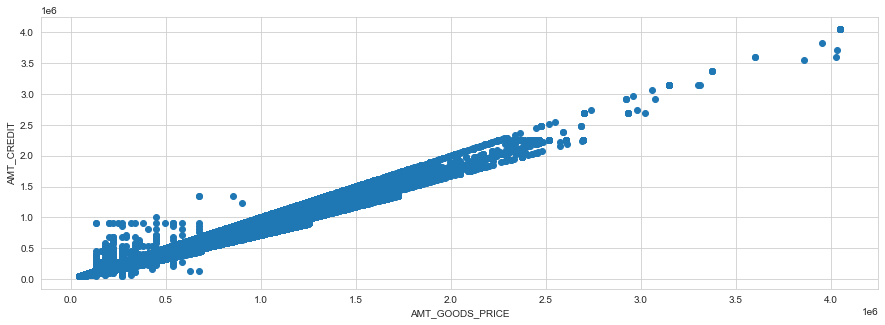

In [18]:
plt.figure(figsize=(15,5))
plt.scatter(df['AMT_CREDIT'], df['AMT_GOODS_PRICE'])
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_CREDIT')
plt.show()

The scatter plot shows that **the higher the price of the goods for consumer loans, the higher the credit amount of the loan** that the client borrows from Home Credit Indonesia.

#### Target Variable

The target variable used for this analysis is in the `TARGET` column with values 0 (the loan was repaid) and 1 (the loan has payment difficulties). We can first examine the number of loans falling
into each category.

Text(0.5, 1.0, 'Target Variable Proportion')

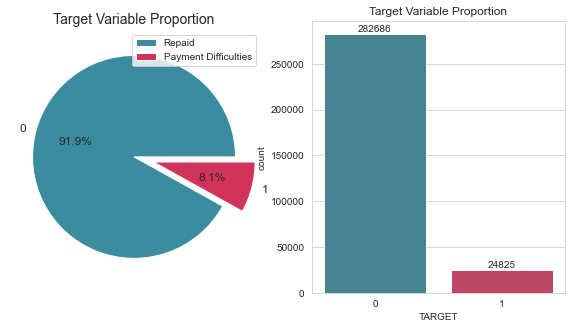

In [19]:
# target variable proportion

plt.figure(figsize=(10,5))

# pie chart
plt.subplot(1,2,1)
churn = df['TARGET'].value_counts()
labels = df['TARGET'].value_counts().index
explode = [0,0.2]
colors = ['#3a8c9e','#d1345b']

plt.title('Target Variable Proportion', fontsize=14)
plt.pie(churn, labels=labels, explode=explode, colors=colors,
        autopct='%.1f%%', textprops={'fontsize':12})
L = plt.legend()
L.get_texts()[0].set_text('Repaid')
L.get_texts()[1].set_text('Payment Difficulties')

# count plot
plt.subplot(1,2,2)
ax = sns.countplot(x=df['TARGET'], order=df['TARGET'].value_counts(ascending=False).index,
                   palette=colors)
values = df['TARGET'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values)
plt.title('Target Variable Proportion')

From the charts, we can see that there are far more loans repaid on time than loans not repaid. This indicates an **imbalance in the target variable** where the number of observations per target class is not equally distributed. Once we get into more sophisticated
machine learning models, we can handle this imbalanced data by doing undersampling or oversampling (we'll get to this more in a later process).

#### Clients' Gender

In [20]:
df['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

In [21]:
# replace XNA to unknown
df['CODE_GENDER'] = df['CODE_GENDER'].replace("XNA","Unknown")
df['CODE_GENDER'].value_counts()

F          202448
M          105059
Unknown         4
Name: CODE_GENDER, dtype: int64

([<matplotlib.patches.Wedge at 0x7f8c84f01e50>,
 [Text(-0.5249067606127868, 0.9666813811504754, 'F'),
  Text(0.5248672085083227, -0.9667028568452051, 'M'),
  Text(1.099999999077028, -4.5061500694222026e-05, 'Unknown')],
 [Text(-0.2863127785160655, 0.5272807533548047, '65.8%'),
  Text(0.28629120464090324, -0.5272924673701118, '34.2%'),
  Text(0.5999999994965606, -2.457900037866656e-05, '0.0%')])

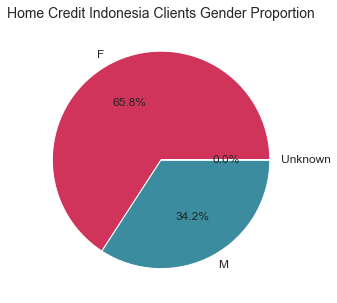

In [22]:
# gender proportion of clients
plt.figure(figsize=(10,5))

gender = df['CODE_GENDER'].value_counts()
labels = df['CODE_GENDER'].value_counts().index
colors = ['#d1345b','#3a8c9e']

plt.title('Home Credit Indonesia Clients Gender Proportion', fontsize=14)
plt.pie(gender, labels=labels, colors=colors,
        autopct='%.1f%%', textprops={'fontsize':12})

The data used for this analysis shows that **the majority of clients who take out loans in Home Credit Indonesia are female** (65,8%), while the others are male (34,2%).

#### Clients' Contract Type

Text(0.5, 1.0, "Clients' Contract Type")

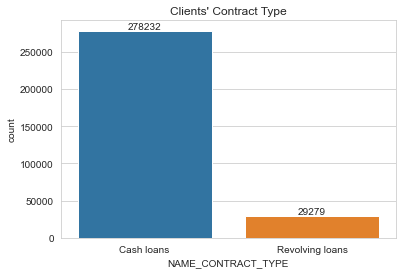

In [23]:
# count plot
ax = sns.countplot(x=df['NAME_CONTRACT_TYPE'], order=df['NAME_CONTRACT_TYPE'].value_counts(ascending=False).index)
values = df['NAME_CONTRACT_TYPE'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values)
plt.title("Clients' Contract Type")

There are **more cash loans than revolving loans** taken out by clients. This means more clients chose to get their loans in cash than draw from and pay back loans multiple times.

#### Clients' Income, Credit, Annuity, and Goods Price

In [24]:
amt = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']

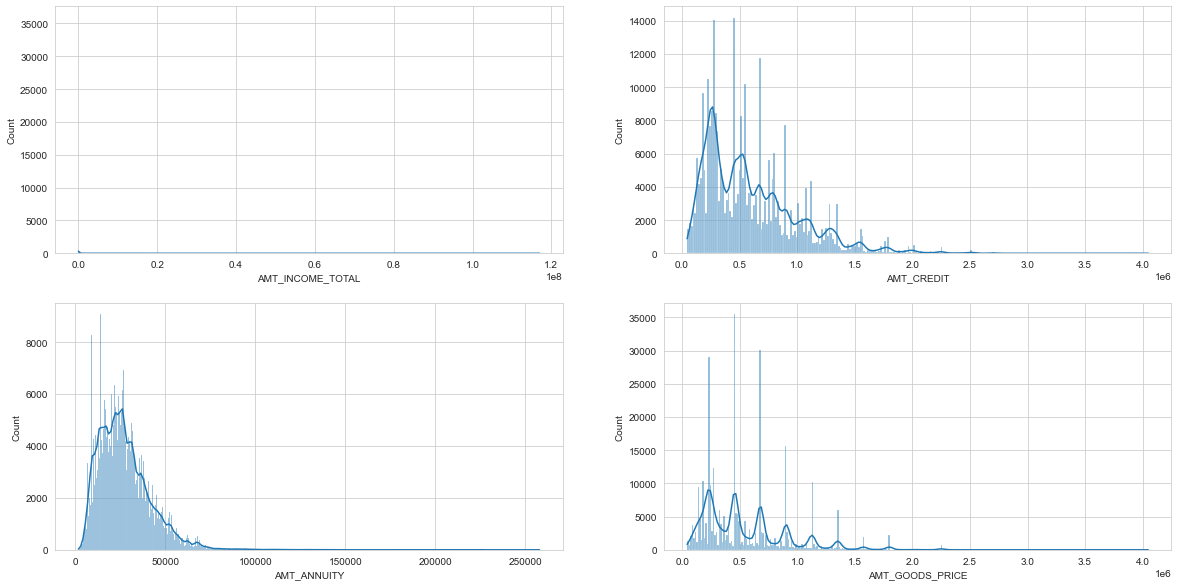

In [25]:
plt.figure(figsize=(20,10))
for x in range(0,len(amt)):
    plt.subplot(2,2,x+1)
    sns.histplot(data=df, x=df[amt[x]], kde=True)

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Applications/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


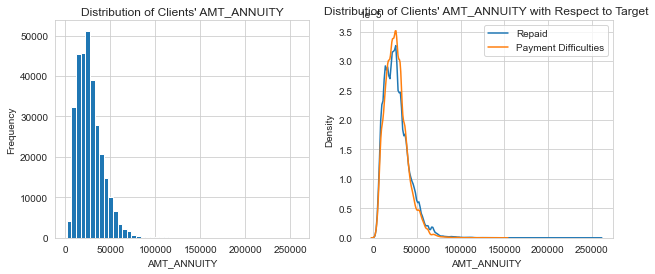

In [26]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
df['AMT_ANNUITY'].plot(kind='hist', bins=50, title='Distribution of Clients\' AMT_ANNUITY');
plt.xlabel('AMT_ANNUITY')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.distplot(df[df['TARGET']==0]['AMT_ANNUITY'], hist=False, label='Repaid')
sns.distplot(df[df['TARGET']==1]['AMT_ANNUITY'], hist=False, label='Payment Difficulties')
plt.title('Distribution of Clients\' AMT_ANNUITY with Respect to Target')
plt.xlabel('AMT_ANNUITY')
plt.legend();
plt.show()

Clients with annuity amounts of under fifty thousand are more likely to have repayment difficulties than those with a higher credit amount of the loan.

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Applications/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


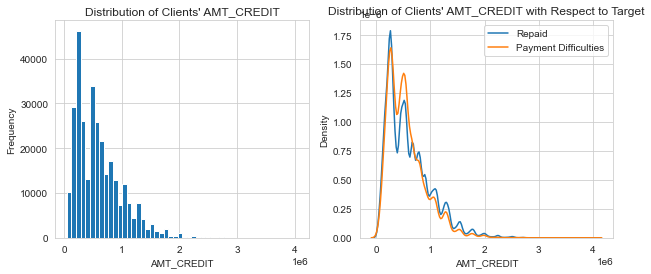

In [27]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
df['AMT_CREDIT'].plot(kind='hist', bins=50, title='Distribution of Clients\' AMT_CREDIT');
plt.xlabel('AMT_CREDIT')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.distplot(df[df['TARGET']==0]['AMT_CREDIT'], hist=False, label='Repaid')
sns.distplot(df[df['TARGET']==1]['AMT_CREDIT'], hist=False, label='Payment Difficulties')
plt.title('Distribution of Clients\' AMT_CREDIT with Respect to Target')
plt.xlabel('AMT_CREDIT')
plt.legend();
plt.show()

Clients with credit amount under one million are more likely to have repay difficulties than those with higher credit amou of the loan.

#### Clients' Income Type, Education, Family Status, Housing Type, Occupation, and Organization Type

In [28]:
name = ['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
        'NAME_HOUSING_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE']

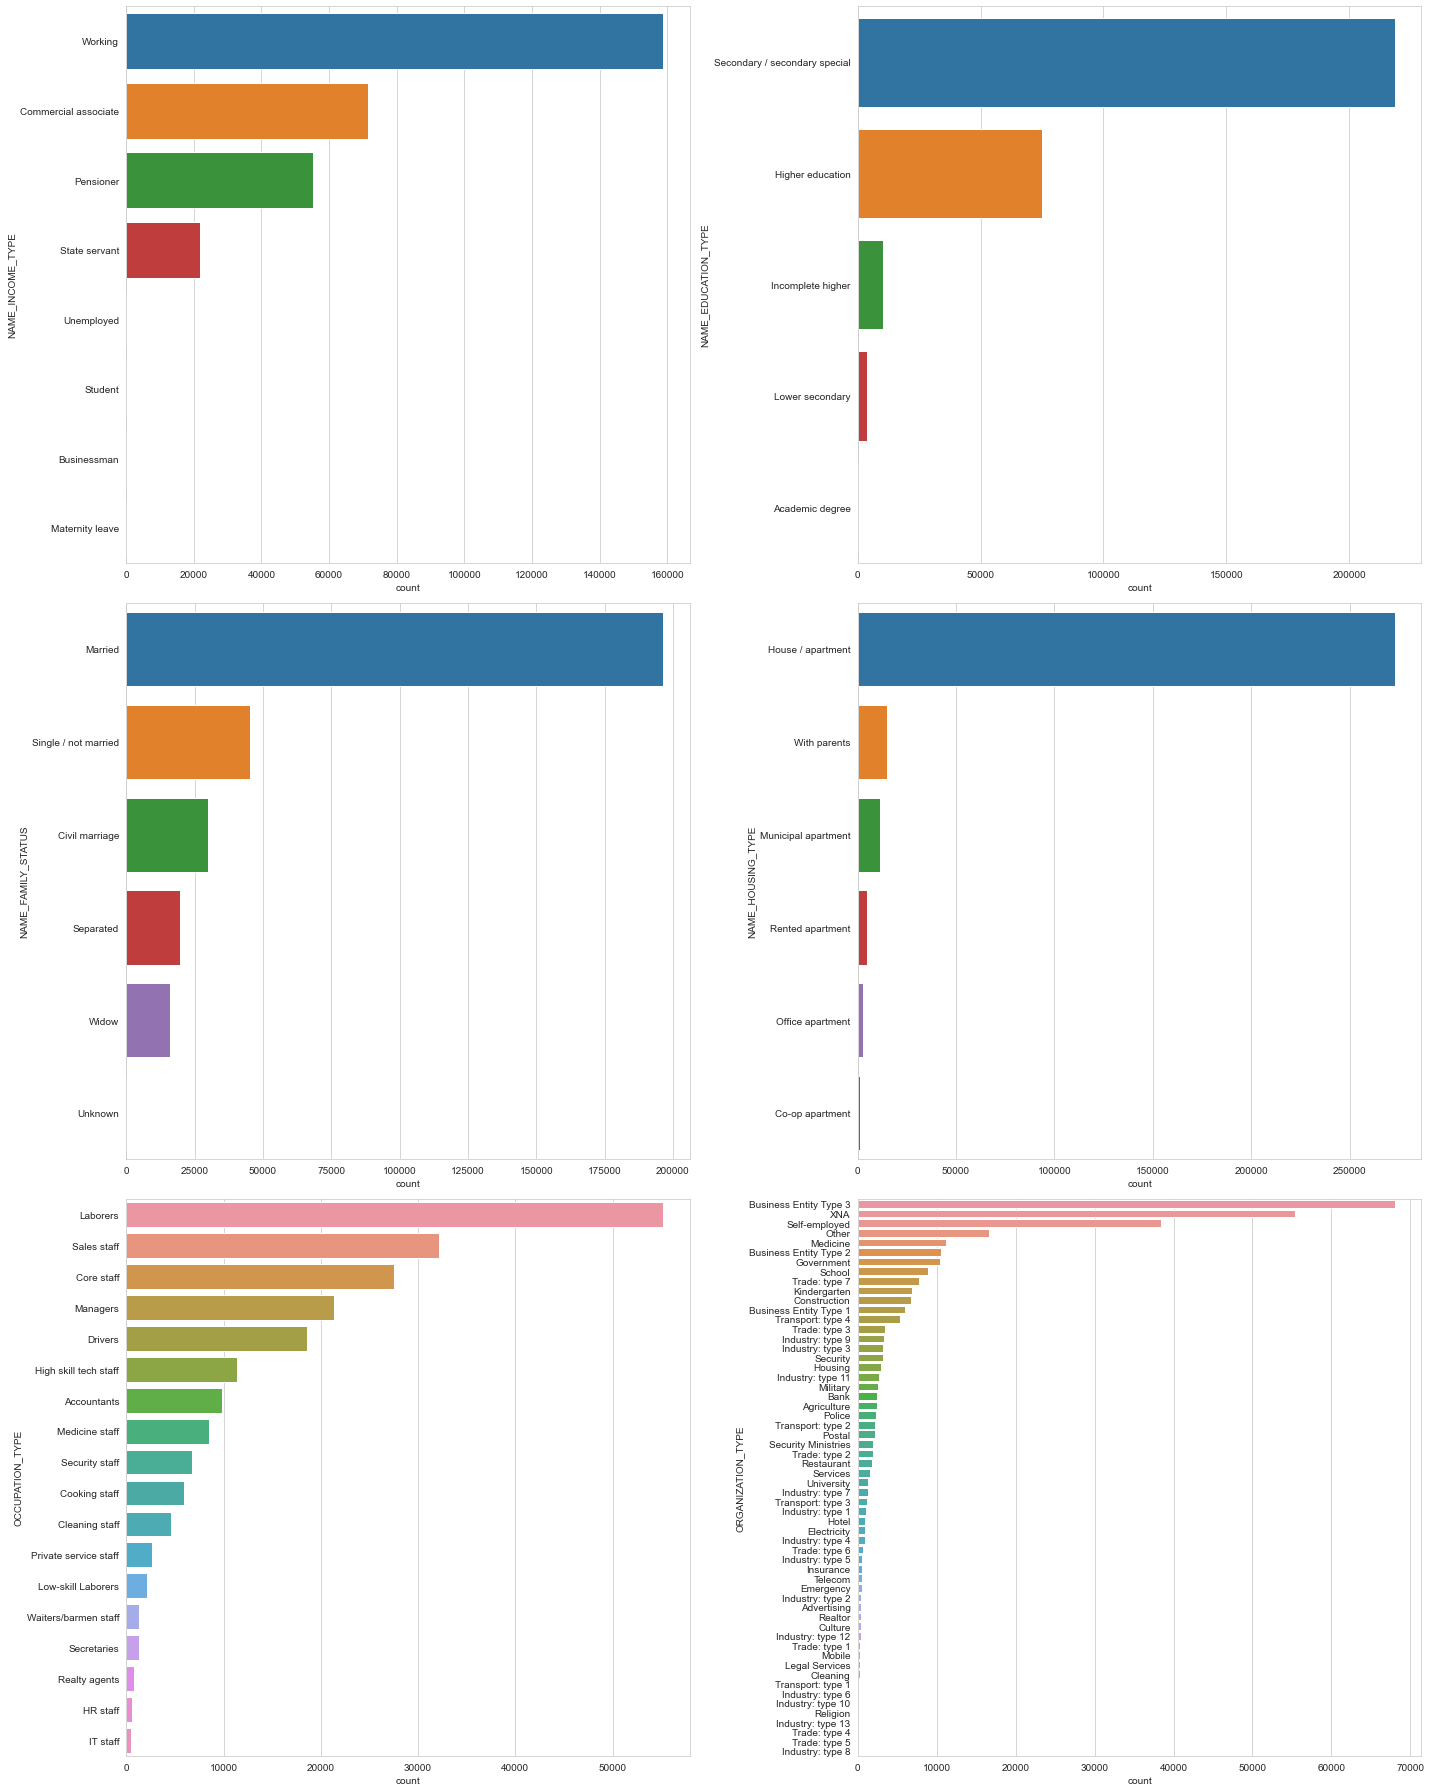

In [29]:
plt.figure(figsize=(20,25))
for x in range(0,len(name)):
    plt.subplot(3,2,x+1)
    sns.countplot(data=df, y=df[name[x]], order=df[name[x]].value_counts(ascending=False).index)
plt.tight_layout()

### **Data Pre-processing**

#### Missing Values

In [30]:
# check missing values in train data
count = train.isnull().sum().sort_values(ascending=False)
percentage = ((train.isnull().sum()/len(train)*100)).sort_values(ascending=False)
train_missing = pd.concat([count, percentage], axis=1, keys=['Count','Percentage'])
train_missing.head(10)

,Count,Percentage
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953


In [31]:
# check missing values in test data
count = test.isnull().sum().sort_values(ascending=False)
percentage = ((test.isnull().sum()/len(test)*100)).sort_values(ascending=False)
test_missing = pd.concat([count, percentage], axis=1, keys=['Count','Percentage'])
test_missing.head(10)

,Count,Percentage
COMMONAREA_AVG,33495,68.716150
COMMONAREA_MODE,33495,68.716150
COMMONAREA_MEDI,33495,68.716150
NONLIVINGAPARTMENTS_AVG,33347,68.412523
NONLIVINGAPARTMENTS_MODE,33347,68.412523
NONLIVINGAPARTMENTS_MEDI,33347,68.412523
FONDKAPREMONT_MODE,32797,67.284179
LIVINGAPARTMENTS_AVG,32780,67.249302
LIVINGAPARTMENTS_MODE,32780,67.249302
LIVINGAPARTMENTS_MEDI,32780,67.249302


We'll drop columns with more than 60% missing values because trying to impute them might lead to inaccuracies.

In [32]:
train_threshold = len(train) * 0.60
int(train_threshold)

184506

In [33]:
test_threshold = len(test) * 0.60
int(test_threshold)

29246

In [34]:
print("Train data columns with more than 60% missing values:\n")
print(train.columns[train.isnull().sum() > int(train_threshold)])

print("\n----------------------------------------------------------------------\n")

print("Test data columns with more than 60% missing values:\n")
print(test.columns[test.isnull().sum() > int(test_threshold)])

Train data columns with more than 60% missing values:

Index(['OWN_CAR_AGE', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'FLOORSMIN_AVG',
       'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_AVG', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'FLOORSMIN_MODE', 'LIVINGAPARTMENTS_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'FLOORSMIN_MEDI', 'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'FONDKAPREMONT_MODE'],
      dtype='object')

----------------------------------------------------------------------

Test data columns with more than 60% missing values:

Index(['OWN_CAR_AGE', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'FLOORSMIN_AVG',
       'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_AVG', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'FLOORSMIN_MODE', 'LIVINGAPARTMENTS_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'FLOORSMIN_MEDI', 'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'FONDKAPR

In [35]:
train_new = train.dropna(axis=1, thresh=train_threshold)
print('Train data shape (with ID):',train_new.shape)
test_new = test.dropna(axis=1, thresh=test_threshold)
print('Test data shape (with ID):',test_new.shape)

Train data shape (with ID): (307511, 73)
Test data shape (with ID): (48744, 72)


After dropping the same columns (columns with more than 60% missing values) from the train and test data, now there are 307511 rows and 73 columns (1 target variable: TARGET) in train data, while there are 48744 rows and 72 columns in test data.

#### **Handle Missing Values in Numerical Columns**

In [36]:
num_feature_train = train_new.dtypes!=object
num_train = train_new.columns[num_feature_train].tolist()

num_feature_test = test_new.dtypes!=object
num_test = test_new.columns[num_feature_test].tolist()

In [37]:
numeric_train = train_new[num_train]
numeric_test = test_new[num_test]

In [38]:
numeric_train.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
numeric_test.head()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,0,135000.0,568800.0,20560.5,450000.0,0.018850,-19241,-2329,-5170.0,-812,1,1,0,1,0,1,2.0,2,2,18,0,0,0,0,0,0,0.789654,0.159520,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,0,99000.0,222768.0,17370.0,180000.0,0.035792,-18064,-4469,-9118.0,-1623,1,1,0,1,0,0,2.0,2,2,9,0,0,0,0,0,0,0.291656,0.432962,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,0,202500.0,663264.0,69777.0,630000.0,0.019101,-20038,-4458,-2175.0,-3503,1,1,0,1,0,0,2.0,2,2,14,0,0,0,0,0,0,0.699787,0.610991,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,-13976,-1866,-2000.0,-4208,1,1,0,1,1,0,4.0,2,2,11,0,0,0,0,0,0,0.509677,0.612704,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,1,180000.0,625500.0,32067.0,625500.0,0.010032,-13040,-2191,-4000.0,-4262,1,1,1,1,0,0,3.0,2,2,5,0,0,0,0,1,1,0.425687,NaN,0.0,0.0,0.0,0.0,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


#### Numerical Discrete

In [40]:
# discrete numerical columns
disc_feature_train = numeric_train.dtypes==int
disc_train = numeric_train.columns[disc_feature_train].tolist()
discrete_train = numeric_train[disc_train]

disc_feature_test = numeric_test.dtypes==int
disc_test = numeric_test.columns[disc_feature_test].tolist()
discrete_test = numeric_test[disc_test]

In [41]:
discrete_train.isnull().sum().sort_values(ascending=False)

SK_ID_CURR                     0
FLAG_DOCUMENT_2                0
FLAG_DOCUMENT_4                0
FLAG_DOCUMENT_5                0
FLAG_DOCUMENT_6                0
FLAG_DOCUMENT_7                0
FLAG_DOCUMENT_8                0
FLAG_DOCUMENT_9                0
FLAG_DOCUMENT_10               0
FLAG_DOCUMENT_11               0
FLAG_DOCUMENT_12               0
FLAG_DOCUMENT_13               0
FLAG_DOCUMENT_14               0
FLAG_DOCUMENT_15               0
FLAG_DOCUMENT_16               0
FLAG_DOCUMENT_17               0
FLAG_DOCUMENT_18               0
FLAG_DOCUMENT_19               0
FLAG_DOCUMENT_20               0
FLAG_DOCUMENT_3                0
LIVE_CITY_NOT_WORK_CITY        0
TARGET                         0
REG_CITY_NOT_WORK_CITY         0
CNT_CHILDREN                   0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_

In [42]:
discrete_test.isnull().sum().sort_values(ascending=False)

SK_ID_CURR                     0
CNT_CHILDREN                   0
FLAG_DOCUMENT_4                0
FLAG_DOCUMENT_5                0
FLAG_DOCUMENT_6                0
FLAG_DOCUMENT_7                0
FLAG_DOCUMENT_8                0
FLAG_DOCUMENT_9                0
FLAG_DOCUMENT_10               0
FLAG_DOCUMENT_11               0
FLAG_DOCUMENT_12               0
FLAG_DOCUMENT_13               0
FLAG_DOCUMENT_14               0
FLAG_DOCUMENT_15               0
FLAG_DOCUMENT_16               0
FLAG_DOCUMENT_17               0
FLAG_DOCUMENT_18               0
FLAG_DOCUMENT_19               0
FLAG_DOCUMENT_20               0
FLAG_DOCUMENT_3                0
FLAG_DOCUMENT_2                0
LIVE_CITY_NOT_WORK_CITY        0
FLAG_PHONE                     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_EMAIL

There are **no missing values in numerical discrete columns** of train and test data.

#### Numerical Continuous

In [43]:
# continuous numerical columns
cont_feature_train = numeric_train.dtypes==float
cont_train = numeric_train.columns[cont_feature_train].tolist()
continuous_train = numeric_train[cont_train]

cont_feature_test = numeric_test.dtypes==float
cont_test = numeric_test.columns[cont_feature_test].tolist()
continuous_test = numeric_test[cont_test]

In [44]:
continuous_train.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,1.0,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,2.0,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0,1.0,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,135000.0,312682.5,29686.5,297000.0,0.008019,-9833.0,2.0,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,121500.0,513000.0,21865.5,513000.0,0.028663,-4311.0,1.0,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
continuous_test.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,135000.0,568800.0,20560.5,450000.0,0.018850,-5170.0,2.0,0.789654,0.159520,0.0,0.0,0.0,0.0,-1740.0,0.0,0.0,0.0,0.0,0.0,0.0
1,99000.0,222768.0,17370.0,180000.0,0.035792,-9118.0,2.0,0.291656,0.432962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,202500.0,663264.0,69777.0,630000.0,0.019101,-2175.0,2.0,0.699787,0.610991,0.0,0.0,0.0,0.0,-856.0,0.0,0.0,0.0,0.0,1.0,4.0
3,315000.0,1575000.0,49018.5,1575000.0,0.026392,-2000.0,4.0,0.509677,0.612704,0.0,0.0,0.0,0.0,-1805.0,0.0,0.0,0.0,0.0,0.0,3.0
4,180000.0,625500.0,32067.0,625500.0,0.010032,-4000.0,3.0,0.425687,NaN,0.0,0.0,0.0,0.0,-821.0,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
continuous_train.isnull().sum().sort_values(ascending=False)

EXT_SOURCE_3                  60965
AMT_REQ_CREDIT_BUREAU_YEAR    41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_HOUR    41519
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_30_CNT_SOCIAL_CIRCLE       1021
EXT_SOURCE_2                    660
AMT_GOODS_PRICE                 278
AMT_ANNUITY                      12
CNT_FAM_MEMBERS                   2
DAYS_LAST_PHONE_CHANGE            1
AMT_CREDIT                        0
DAYS_REGISTRATION                 0
REGION_POPULATION_RELATIVE        0
AMT_INCOME_TOTAL                  0
dtype: int64

In [47]:
continuous_test.isnull().sum().sort_values(ascending=False)

EXT_SOURCE_3                  8668
AMT_REQ_CREDIT_BUREAU_YEAR    6049
AMT_REQ_CREDIT_BUREAU_QRT     6049
AMT_REQ_CREDIT_BUREAU_MON     6049
AMT_REQ_CREDIT_BUREAU_WEEK    6049
AMT_REQ_CREDIT_BUREAU_DAY     6049
AMT_REQ_CREDIT_BUREAU_HOUR    6049
OBS_60_CNT_SOCIAL_CIRCLE        29
DEF_60_CNT_SOCIAL_CIRCLE        29
DEF_30_CNT_SOCIAL_CIRCLE        29
OBS_30_CNT_SOCIAL_CIRCLE        29
AMT_ANNUITY                     24
EXT_SOURCE_2                     8
AMT_CREDIT                       0
DAYS_LAST_PHONE_CHANGE           0
CNT_FAM_MEMBERS                  0
DAYS_REGISTRATION                0
REGION_POPULATION_RELATIVE       0
AMT_GOODS_PRICE                  0
AMT_INCOME_TOTAL                 0
dtype: int64

There are **a few missing values in numerical continuous columns** of train and test data.

#### Outlier

In [48]:
def lower_outlier(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    lower = df[(df[col] < (q1_col - 1.5 * iqr_col))]
    return lower

def upper_outlier(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    upper = df[(df[col] > (q3_col + 1.5 * iqr_col))]
    return upper

def view_outlier(df, col):
    print("----------------------------------- {} -----------------------------------".format(col))
    print("lower outlier: {}\nupper outlier: {}\n".format(lower_outlier(df,col).shape[0], upper_outlier(df,col).shape[0]))
    plt.figure(figsize=(10,8))
    plt.subplot(2,1,1)
    df[col].plot(kind='box', subplots=True, sharex=False, vert=False)
    plt.subplot(2,1,2)
    df[col].plot(kind='density', subplots=True, sharex=False)
    plt.show()

In [49]:
Q1 = train_new.quantile(0.25)
Q3 = train_new.quantile(0.75)
IQR = Q3 - Q1

In [50]:
continuous_train_col = continuous_train.columns

----------------------------------- AMT_INCOME_TOTAL -----------------------------------
lower outlier: 0
upper outlier: 14035



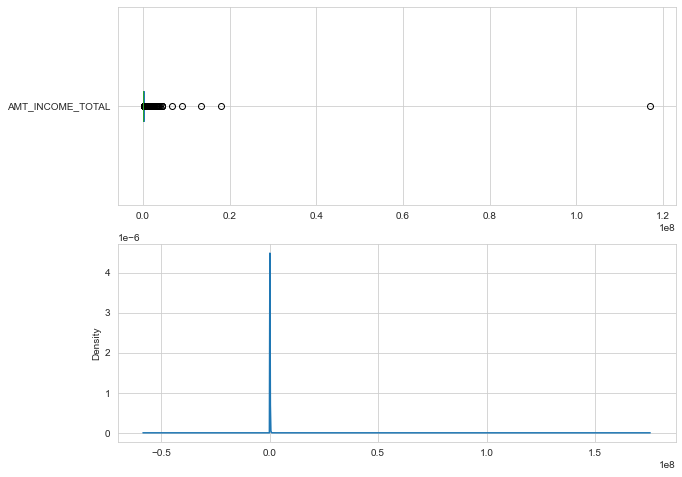

----------------------------------- AMT_CREDIT -----------------------------------
lower outlier: 0
upper outlier: 6562



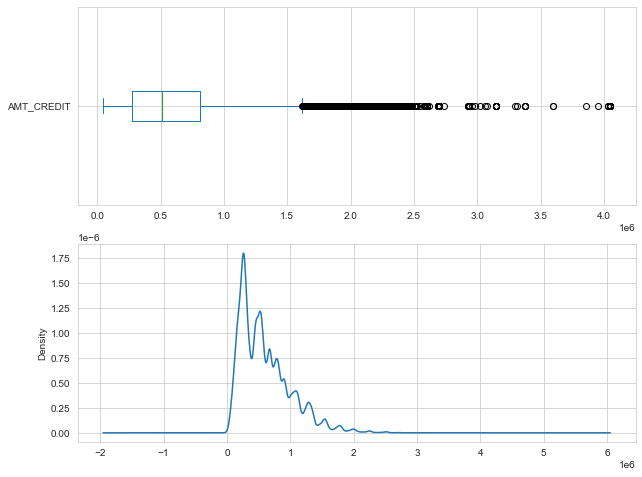

----------------------------------- AMT_ANNUITY -----------------------------------
lower outlier: 0
upper outlier: 7504



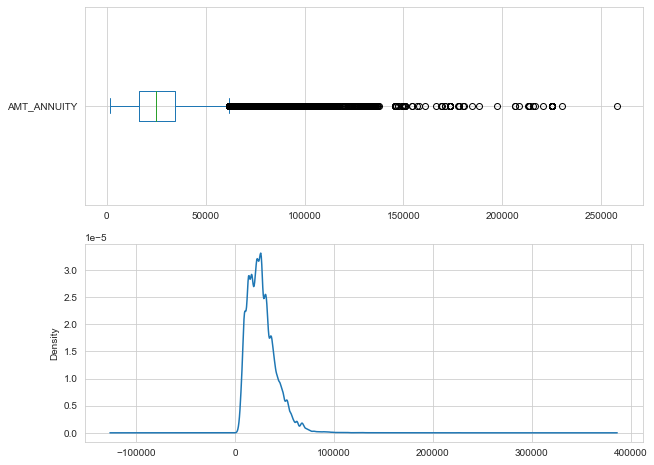

----------------------------------- AMT_GOODS_PRICE -----------------------------------
lower outlier: 0
upper outlier: 14728



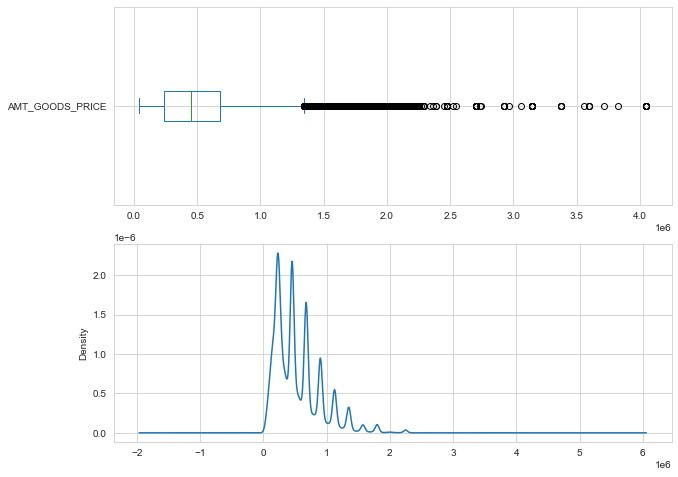

----------------------------------- REGION_POPULATION_RELATIVE -----------------------------------
lower outlier: 0
upper outlier: 8412



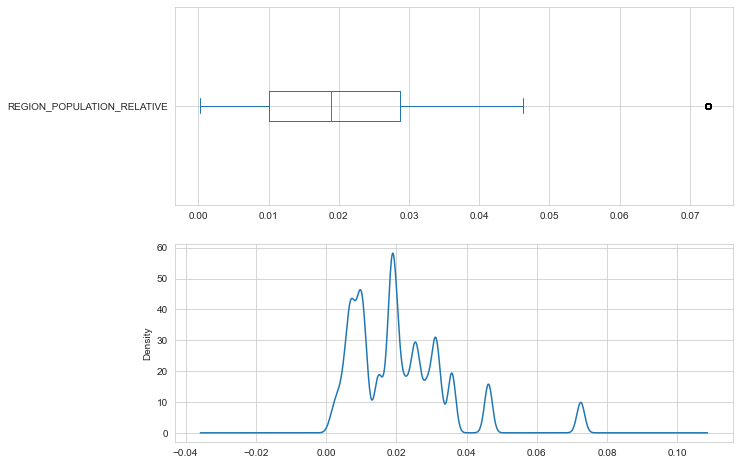

----------------------------------- DAYS_REGISTRATION -----------------------------------
lower outlier: 659
upper outlier: 0



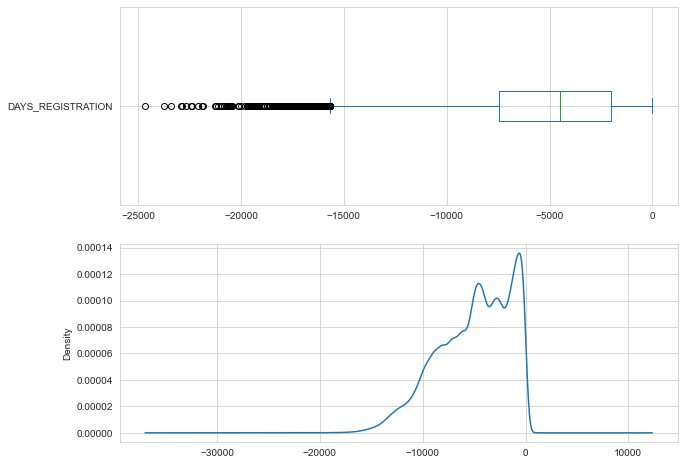

----------------------------------- CNT_FAM_MEMBERS -----------------------------------
lower outlier: 0
upper outlier: 4007



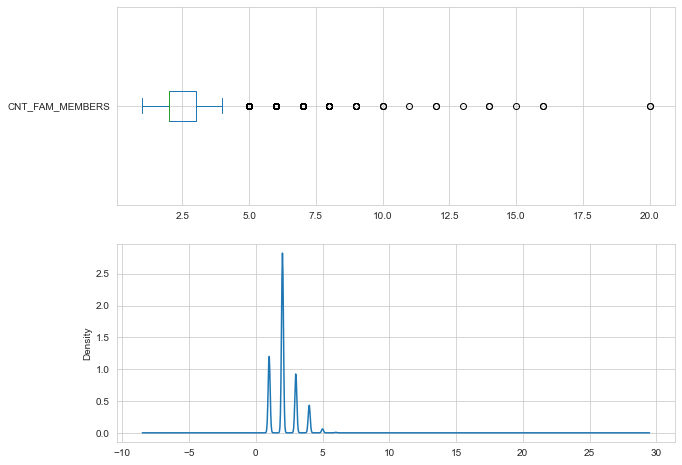

----------------------------------- EXT_SOURCE_2 -----------------------------------
lower outlier: 0
upper outlier: 0



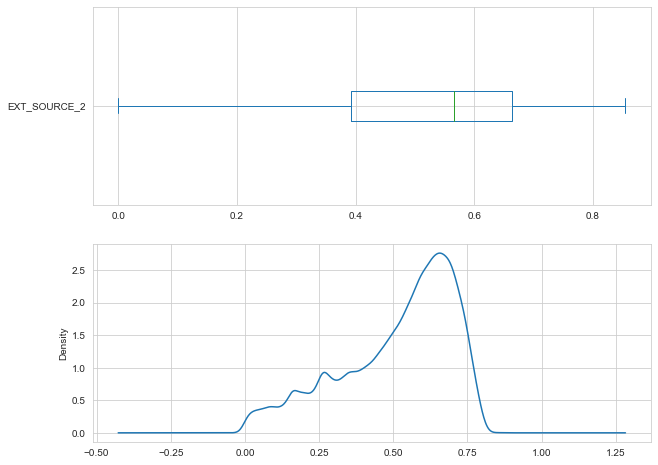

----------------------------------- EXT_SOURCE_3 -----------------------------------
lower outlier: 0
upper outlier: 0



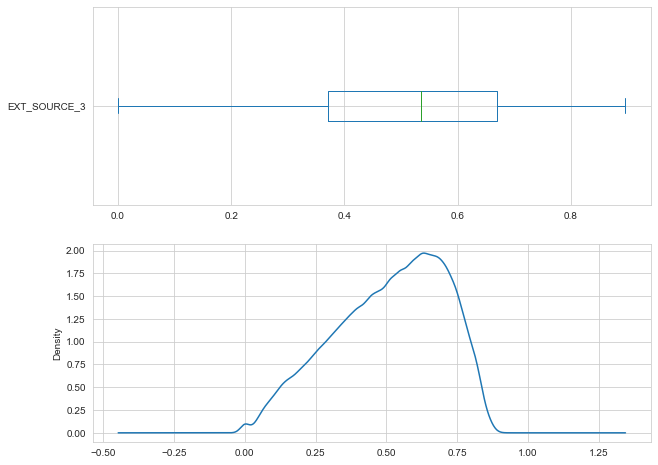

----------------------------------- OBS_30_CNT_SOCIAL_CIRCLE -----------------------------------
lower outlier: 0
upper outlier: 19971



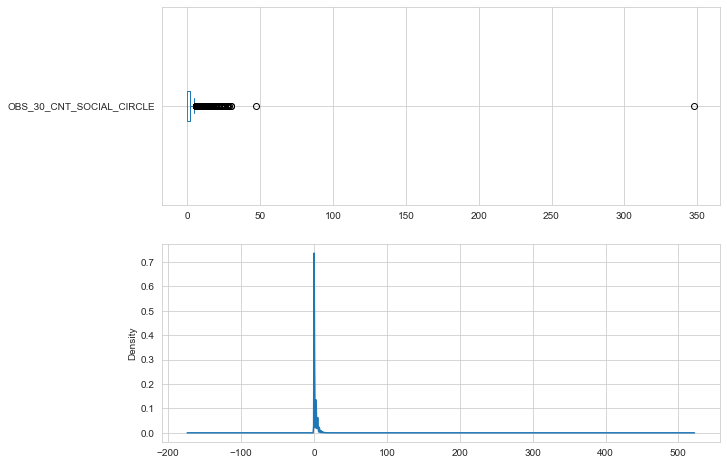

----------------------------------- DEF_30_CNT_SOCIAL_CIRCLE -----------------------------------
lower outlier: 0
upper outlier: 35166



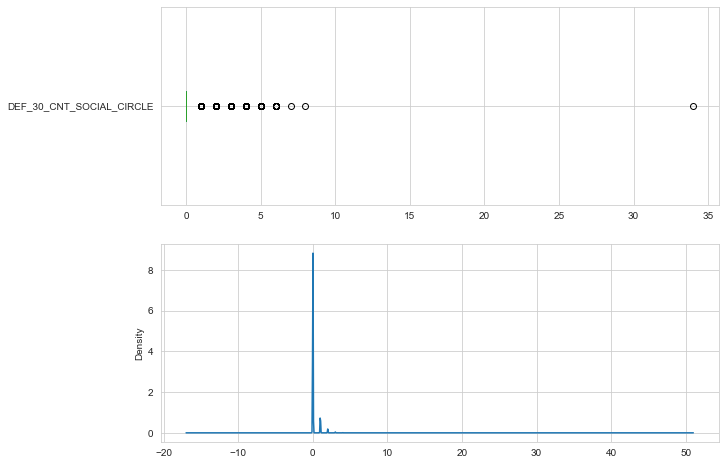

----------------------------------- OBS_60_CNT_SOCIAL_CIRCLE -----------------------------------
lower outlier: 0
upper outlier: 19564



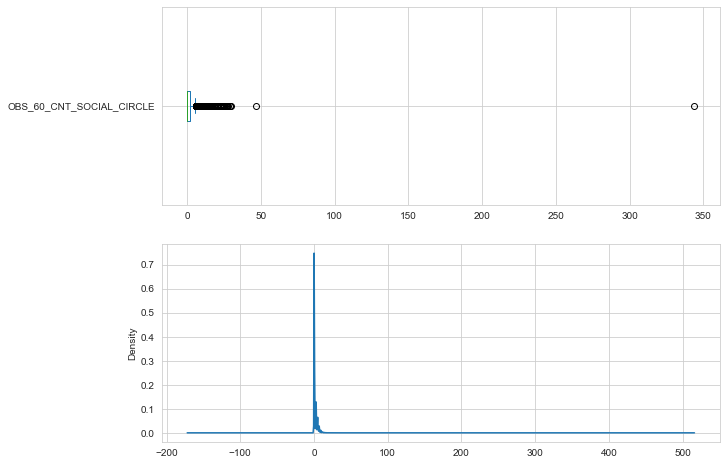

----------------------------------- DEF_60_CNT_SOCIAL_CIRCLE -----------------------------------
lower outlier: 0
upper outlier: 25769



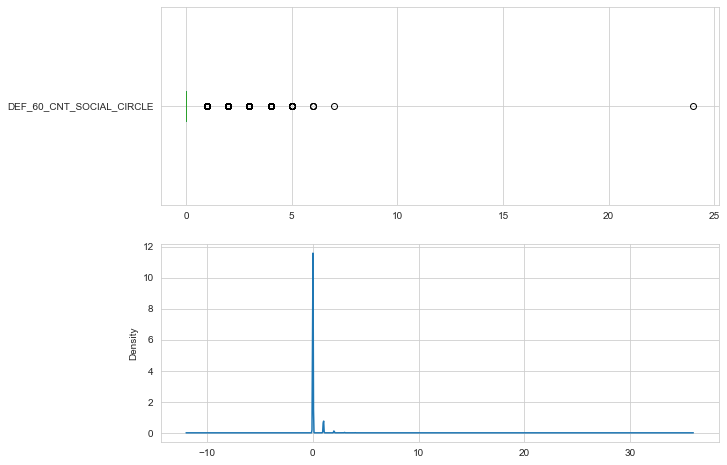

----------------------------------- DAYS_LAST_PHONE_CHANGE -----------------------------------
lower outlier: 435
upper outlier: 0



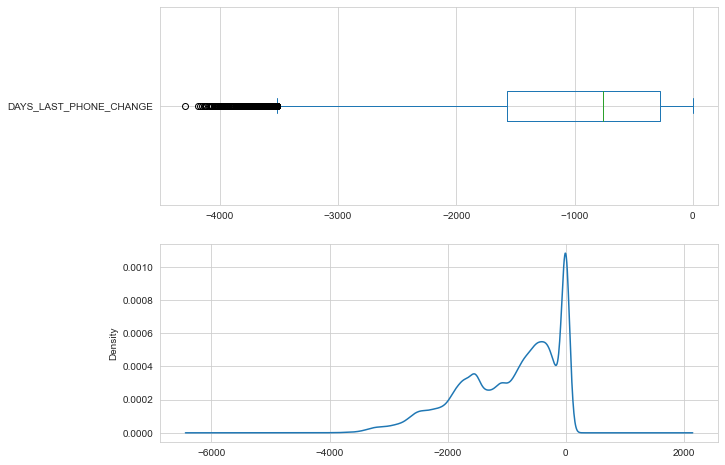

----------------------------------- AMT_REQ_CREDIT_BUREAU_HOUR -----------------------------------
lower outlier: 0
upper outlier: 1626



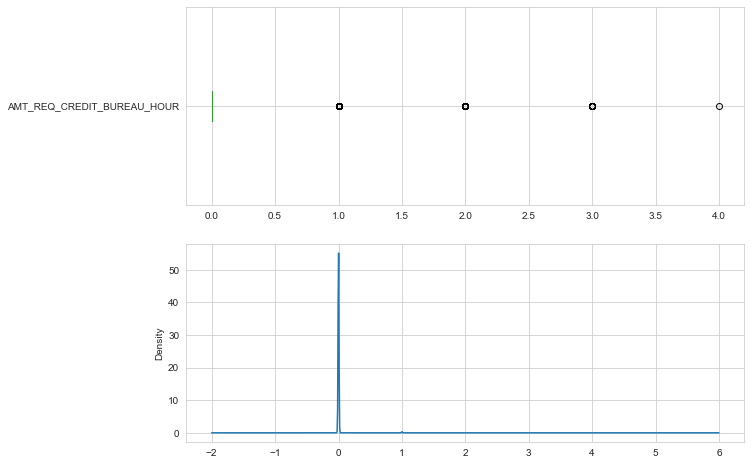

----------------------------------- AMT_REQ_CREDIT_BUREAU_DAY -----------------------------------
lower outlier: 0
upper outlier: 1489



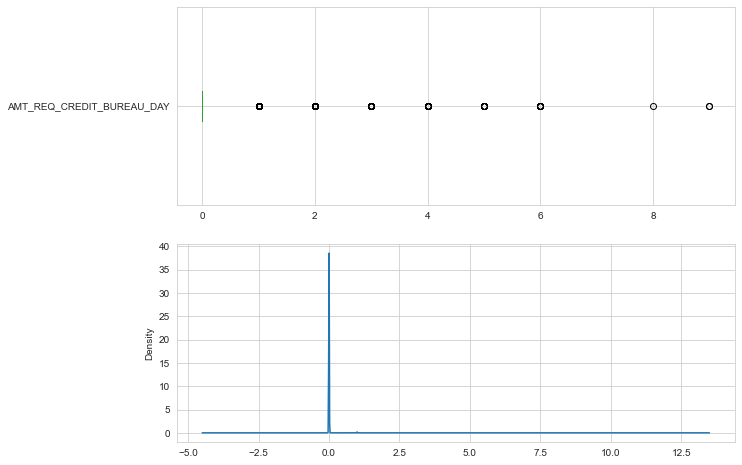

----------------------------------- AMT_REQ_CREDIT_BUREAU_WEEK -----------------------------------
lower outlier: 0
upper outlier: 8536



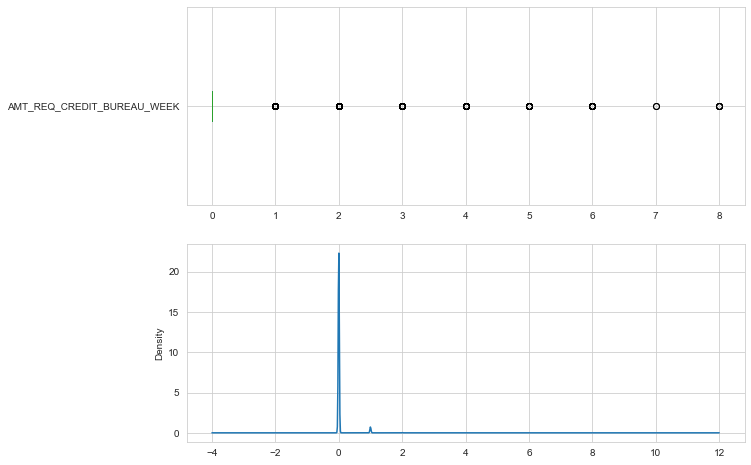

----------------------------------- AMT_REQ_CREDIT_BUREAU_MON -----------------------------------
lower outlier: 0
upper outlier: 43759



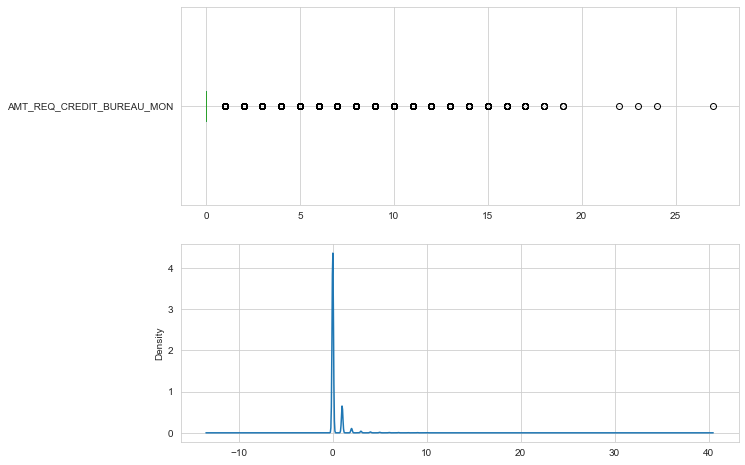

----------------------------------- AMT_REQ_CREDIT_BUREAU_QRT -----------------------------------
lower outlier: 0
upper outlier: 50575



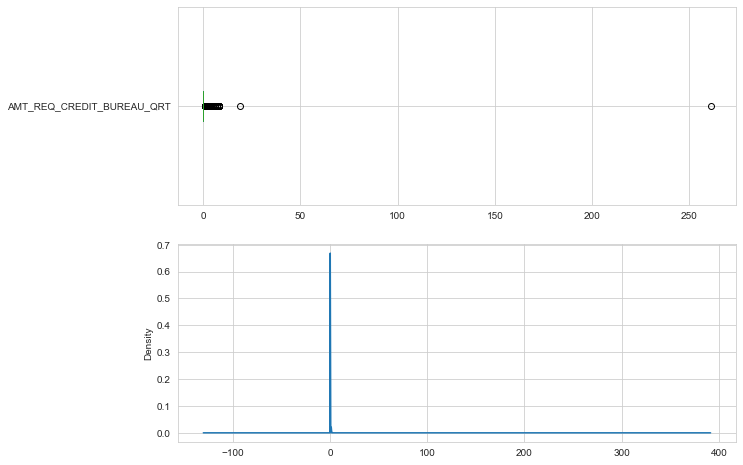

----------------------------------- AMT_REQ_CREDIT_BUREAU_YEAR -----------------------------------
lower outlier: 0
upper outlier: 3364



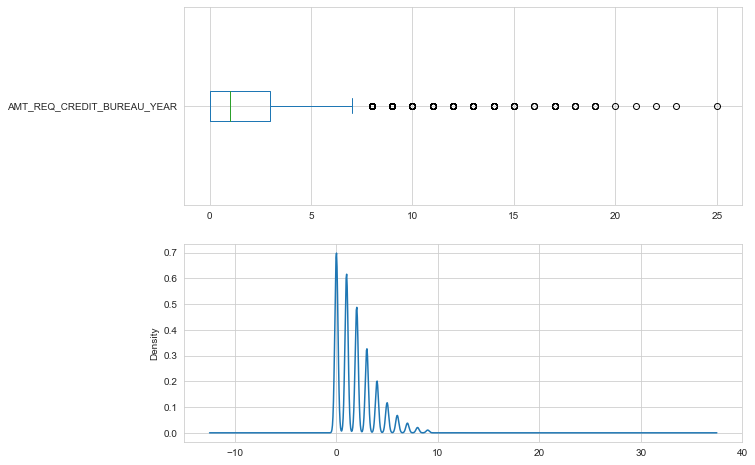

In [51]:
for i in range(len(continuous_train_col)):
    view_outlier(continuous_train[continuous_train_col], continuous_train_col[i])

In [52]:
continuous_train_is_null = continuous_train.isnull().sum() != 0
continuous_train_is_null_cols = continuous_train.columns[continuous_train_is_null].tolist()
print("Train data numerical continuous columns with missing values: \n\n",continuous_train_is_null_cols)

print("\n----------------------------------------------------------------------\n")

continuous_test_is_null = continuous_test.isnull().sum() != 0
continuous_test_is_null_cols = continuous_test.columns[continuous_test_is_null].tolist()
print("Test data numerical continuous columns with missing values: \n\n",continuous_test_is_null_cols)

Train data numerical continuous columns with missing values: 

 ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

----------------------------------------------------------------------

Test data numerical continuous columns with missing values: 

 ['AMT_ANNUITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


There are a few **outliers** in the numerical continuous columns. Therefore, we'll **replace the missing values** in numerical continuous columns with their respective **median**.

In [53]:
def replace_mean(df, col):
    df[col] = df[col].fillna(df[col].mean())
    print("NaNs in {} are replaced with {}".format(col, df[col].mean()))

def replace_median(df, col):
    df[col] = df[col].fillna(df[col].median())
    print("NaNs in {} are replaced with {}".format(col, df[col].median()))

In [54]:
print("Train data numerical continuous columns with missing values:\n")
for i in range(len(continuous_train_is_null_cols)):
    replace_median(continuous_train, continuous_train_is_null_cols[i])

print("\n----------------------------------------------------------------------\n")

print("Test data numerical continuous columns with missing values:\n")
for i in range(len(continuous_test_is_null_cols)):
    replace_median(continuous_test, continuous_test_is_null_cols[i])

Train data numerical continuous columns with missing values:

NaNs in AMT_ANNUITY are replaced with 24903.0
NaNs in AMT_GOODS_PRICE are replaced with 450000.0
NaNs in CNT_FAM_MEMBERS are replaced with 2.0
NaNs in EXT_SOURCE_2 are replaced with 0.5659614260608526
NaNs in EXT_SOURCE_3 are replaced with 0.5352762504724826
NaNs in OBS_30_CNT_SOCIAL_CIRCLE are replaced with 0.0
NaNs in DEF_30_CNT_SOCIAL_CIRCLE are replaced with 0.0
NaNs in OBS_60_CNT_SOCIAL_CIRCLE are replaced with 0.0
NaNs in DEF_60_CNT_SOCIAL_CIRCLE are replaced with 0.0
NaNs in DAYS_LAST_PHONE_CHANGE are replaced with -757.0
NaNs in AMT_REQ_CREDIT_BUREAU_HOUR are replaced with 0.0
NaNs in AMT_REQ_CREDIT_BUREAU_DAY are replaced with 0.0
NaNs in AMT_REQ_CREDIT_BUREAU_WEEK are replaced with 0.0
NaNs in AMT_REQ_CREDIT_BUREAU_MON are replaced with 0.0
NaNs in AMT_REQ_CREDIT_BUREAU_QRT are replaced with 0.0
NaNs in AMT_REQ_CREDIT_BUREAU_YEAR are replaced with 1.0

---------------------------------------------------------------

In [55]:
continuous_train.isnull().sum().sort_values(ascending = False)

AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_HOUR    0
DAYS_LAST_PHONE_CHANGE        0
DEF_60_CNT_SOCIAL_CIRCLE      0
OBS_60_CNT_SOCIAL_CIRCLE      0
DEF_30_CNT_SOCIAL_CIRCLE      0
OBS_30_CNT_SOCIAL_CIRCLE      0
EXT_SOURCE_3                  0
EXT_SOURCE_2                  0
CNT_FAM_MEMBERS               0
DAYS_REGISTRATION             0
REGION_POPULATION_RELATIVE    0
AMT_GOODS_PRICE               0
AMT_ANNUITY                   0
AMT_REQ_CREDIT_BUREAU_YEAR    0
dtype: int64

In [56]:
continuous_test.isnull().sum().sort_values(ascending = False)

AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_HOUR    0
DAYS_LAST_PHONE_CHANGE        0
DEF_60_CNT_SOCIAL_CIRCLE      0
OBS_60_CNT_SOCIAL_CIRCLE      0
DEF_30_CNT_SOCIAL_CIRCLE      0
OBS_30_CNT_SOCIAL_CIRCLE      0
EXT_SOURCE_3                  0
EXT_SOURCE_2                  0
CNT_FAM_MEMBERS               0
DAYS_REGISTRATION             0
REGION_POPULATION_RELATIVE    0
AMT_GOODS_PRICE               0
AMT_ANNUITY                   0
AMT_REQ_CREDIT_BUREAU_YEAR    0
dtype: int64

#### Manage Outlier

In [57]:
def detect_outlier(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    return df[((df[col] < (q1_col - 1.5 * iqr_col))|(df[col] > (q3_col + 1.5 * iqr_col)))]

In [58]:
col_names_train = numeric_train.columns
col_names_test = numeric_test.columns

In [59]:
print("Train data outlier:\n")
for i in range(len(col_names_train)):
    print("{}: {}".format(col_names_train[i],(detect_outlier(numeric_train,col_names_train[i]).shape[0])))
    
print("\n----------------------------------------------------------------------\n")

print("Test data outlier:\n")
for i in range(len(col_names_test)):
    print("{}: {}".format(col_names_test[i],(detect_outlier(numeric_test,col_names_test[i]).shape[0])))

Train data outlier:

SK_ID_CURR: 0
TARGET: 24825
CNT_CHILDREN: 4272
AMT_INCOME_TOTAL: 14035
AMT_CREDIT: 6562
AMT_ANNUITY: 7504
AMT_GOODS_PRICE: 14728
REGION_POPULATION_RELATIVE: 8412
DAYS_BIRTH: 0
DAYS_EMPLOYED: 72217
DAYS_REGISTRATION: 659
DAYS_ID_PUBLISH: 0
FLAG_MOBIL: 1
FLAG_EMP_PHONE: 55386
FLAG_WORK_PHONE: 61308
FLAG_CONT_MOBILE: 574
FLAG_PHONE: 0
FLAG_EMAIL: 17442
CNT_FAM_MEMBERS: 4007
REGION_RATING_CLIENT: 80527
REGION_RATING_CLIENT_W_CITY: 78027
HOUR_APPR_PROCESS_START: 2257
REG_REGION_NOT_LIVE_REGION: 4657
REG_REGION_NOT_WORK_REGION: 15612
LIVE_REGION_NOT_WORK_REGION: 12503
REG_CITY_NOT_LIVE_CITY: 24039
REG_CITY_NOT_WORK_CITY: 70867
LIVE_CITY_NOT_WORK_CITY: 55215
EXT_SOURCE_2: 0
EXT_SOURCE_3: 0
OBS_30_CNT_SOCIAL_CIRCLE: 19971
DEF_30_CNT_SOCIAL_CIRCLE: 35166
OBS_60_CNT_SOCIAL_CIRCLE: 19564
DEF_60_CNT_SOCIAL_CIRCLE: 25769
DAYS_LAST_PHONE_CHANGE: 435
FLAG_DOCUMENT_2: 13
FLAG_DOCUMENT_3: 0
FLAG_DOCUMENT_4: 25
FLAG_DOCUMENT_5: 4648
FLAG_DOCUMENT_6: 27078
FLAG_DOCUMENT_7: 59
FLAG_DO

In [60]:
outlier_train = []
for i in range(len(num_train)):
    if detect_outlier(numeric_train[num_train],num_train[i]).shape[0] != 0:
        outlier_train.append(num_train[i])

outlier_test = []
for i in range(len(num_test)):
    if detect_outlier(numeric_test[num_test],num_test[i]).shape[0] != 0:
        outlier_test.append(num_test[i])

In [61]:
# without TARGET field
col_names_num = outlier_test

In [62]:
print("Train data number of upper outlier:\n")
for i in range(len(col_names_num)):
    print("{}: {}".format(col_names_num[i],(upper_outlier(numeric_train,col_names_num[i]).shape[0])))
    
print("\n----------------------------------------------------------------------\n")

print("Test data number of upper outlier:\n")
for i in range(len(col_names_num)):
    print("{}: {}".format(col_names_num[i],(upper_outlier(numeric_test,col_names_num[i]).shape[0])))

Train data number of upper outlier:

CNT_CHILDREN: 4272
AMT_INCOME_TOTAL: 14035
AMT_CREDIT: 6562
AMT_ANNUITY: 7504
AMT_GOODS_PRICE: 14728
REGION_POPULATION_RELATIVE: 8412
DAYS_EMPLOYED: 55374
DAYS_REGISTRATION: 0
FLAG_MOBIL: 0
FLAG_EMP_PHONE: 0
FLAG_WORK_PHONE: 61308
FLAG_CONT_MOBILE: 0
FLAG_EMAIL: 17442
CNT_FAM_MEMBERS: 4007
REGION_RATING_CLIENT: 48330
REGION_RATING_CLIENT_W_CITY: 43860
HOUR_APPR_PROCESS_START: 596
REG_REGION_NOT_LIVE_REGION: 4657
REG_REGION_NOT_WORK_REGION: 15612
LIVE_REGION_NOT_WORK_REGION: 12503
REG_CITY_NOT_LIVE_CITY: 24039
REG_CITY_NOT_WORK_CITY: 70867
LIVE_CITY_NOT_WORK_CITY: 55215
OBS_30_CNT_SOCIAL_CIRCLE: 19971
DEF_30_CNT_SOCIAL_CIRCLE: 35166
OBS_60_CNT_SOCIAL_CIRCLE: 19564
DEF_60_CNT_SOCIAL_CIRCLE: 25769
DAYS_LAST_PHONE_CHANGE: 0
FLAG_DOCUMENT_4: 25
FLAG_DOCUMENT_5: 4648
FLAG_DOCUMENT_6: 27078
FLAG_DOCUMENT_7: 59
FLAG_DOCUMENT_8: 25024
FLAG_DOCUMENT_9: 1198
FLAG_DOCUMENT_11: 1203
FLAG_DOCUMENT_18: 2500
AMT_REQ_CREDIT_BUREAU_HOUR: 1626
AMT_REQ_CREDIT_BUREAU_DA

In [63]:
print("Train data number of lower outlier:\n")
for i in range(len(col_names_num)):
    print("{}: {}".format(col_names_num[i],(lower_outlier(numeric_train,col_names_num[i]).shape[0])))
    
print("\n----------------------------------------------------------------------\n")

print("Test data number of lower outlier:\n")
for i in range(len(col_names_num)):
    print("{}: {}".format(col_names_num[i],(lower_outlier(numeric_test,col_names_num[i]).shape[0])))

Train data number of lower outlier:

CNT_CHILDREN: 0
AMT_INCOME_TOTAL: 0
AMT_CREDIT: 0
AMT_ANNUITY: 0
AMT_GOODS_PRICE: 0
REGION_POPULATION_RELATIVE: 0
DAYS_EMPLOYED: 16843
DAYS_REGISTRATION: 659
FLAG_MOBIL: 1
FLAG_EMP_PHONE: 55386
FLAG_WORK_PHONE: 0
FLAG_CONT_MOBILE: 574
FLAG_EMAIL: 0
CNT_FAM_MEMBERS: 0
REGION_RATING_CLIENT: 32197
REGION_RATING_CLIENT_W_CITY: 34167
HOUR_APPR_PROCESS_START: 1661
REG_REGION_NOT_LIVE_REGION: 0
REG_REGION_NOT_WORK_REGION: 0
LIVE_REGION_NOT_WORK_REGION: 0
REG_CITY_NOT_LIVE_CITY: 0
REG_CITY_NOT_WORK_CITY: 0
LIVE_CITY_NOT_WORK_CITY: 0
OBS_30_CNT_SOCIAL_CIRCLE: 0
DEF_30_CNT_SOCIAL_CIRCLE: 0
OBS_60_CNT_SOCIAL_CIRCLE: 0
DEF_60_CNT_SOCIAL_CIRCLE: 0
DAYS_LAST_PHONE_CHANGE: 435
FLAG_DOCUMENT_4: 0
FLAG_DOCUMENT_5: 0
FLAG_DOCUMENT_6: 0
FLAG_DOCUMENT_7: 0
FLAG_DOCUMENT_8: 0
FLAG_DOCUMENT_9: 0
FLAG_DOCUMENT_11: 0
FLAG_DOCUMENT_18: 0
AMT_REQ_CREDIT_BUREAU_HOUR: 0
AMT_REQ_CREDIT_BUREAU_DAY: 0
AMT_REQ_CREDIT_BUREAU_WEEK: 0
AMT_REQ_CREDIT_BUREAU_MON: 0
AMT_REQ_CREDIT_BUREA

In [64]:
def replace_upper(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    tmp = 9999999
    upper = q3_col + 1.5 * iqr_col
    df[col] = df[col].where(lambda x: (x < (upper)), tmp)
    df[col] = df[col].replace(tmp, upper)

def replace_lower(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    tmp = 1111111
    lower = q1_col - 1.5 * iqr_col
    df[col] = df[col].where(lambda x: (x > (lower)), tmp)
    df[col] = df[col].replace(tmp, lower)

In [65]:
for i in range(len(col_names_num)):
    replace_upper(numeric_train, col_names_num[i])   
    
for i in range(len(col_names_num)):
    replace_upper(numeric_test, col_names_num[i]) 

In [66]:
print("Train data number of upper outlier:\n")
for i in range(len(col_names_num)):
    print("{}: {}".format(col_names_num[i],(upper_outlier(numeric_train,col_names_num[i]).shape[0])))
    
print("\n----------------------------------------------------------------------\n")

print("Test data number of upper outlier:\n")
for i in range(len(col_names_num)):
    print("{}: {}".format(col_names_num[i],(upper_outlier(numeric_test,col_names_num[i]).shape[0])))

Train data number of upper outlier:

CNT_CHILDREN: 0
AMT_INCOME_TOTAL: 0
AMT_CREDIT: 0
AMT_ANNUITY: 0
AMT_GOODS_PRICE: 0
REGION_POPULATION_RELATIVE: 0
DAYS_EMPLOYED: 0
DAYS_REGISTRATION: 0
FLAG_MOBIL: 0
FLAG_EMP_PHONE: 0
FLAG_WORK_PHONE: 0
FLAG_CONT_MOBILE: 0
FLAG_EMAIL: 0
CNT_FAM_MEMBERS: 0
REGION_RATING_CLIENT: 0
REGION_RATING_CLIENT_W_CITY: 0
HOUR_APPR_PROCESS_START: 0
REG_REGION_NOT_LIVE_REGION: 0
REG_REGION_NOT_WORK_REGION: 0
LIVE_REGION_NOT_WORK_REGION: 0
REG_CITY_NOT_LIVE_CITY: 0
REG_CITY_NOT_WORK_CITY: 0
LIVE_CITY_NOT_WORK_CITY: 0
OBS_30_CNT_SOCIAL_CIRCLE: 0
DEF_30_CNT_SOCIAL_CIRCLE: 0
OBS_60_CNT_SOCIAL_CIRCLE: 0
DEF_60_CNT_SOCIAL_CIRCLE: 0
DAYS_LAST_PHONE_CHANGE: 0
FLAG_DOCUMENT_4: 0
FLAG_DOCUMENT_5: 0
FLAG_DOCUMENT_6: 0
FLAG_DOCUMENT_7: 0
FLAG_DOCUMENT_8: 0
FLAG_DOCUMENT_9: 0
FLAG_DOCUMENT_11: 0
FLAG_DOCUMENT_18: 0
AMT_REQ_CREDIT_BUREAU_HOUR: 0
AMT_REQ_CREDIT_BUREAU_DAY: 0
AMT_REQ_CREDIT_BUREAU_WEEK: 0
AMT_REQ_CREDIT_BUREAU_MON: 0
AMT_REQ_CREDIT_BUREAU_QRT: 0
AMT_REQ_CREDIT_B

In [67]:
for i in range(len(col_names_num)):
    replace_lower(numeric_train, col_names_num[i])
    
for i in range(len(col_names_num)):
    replace_lower(numeric_test, col_names_num[i])

In [68]:
print("Train data number of lower outlier:\n")
for i in range(len(col_names_num)):
    print("{}: {}".format(col_names_num[i],(lower_outlier(numeric_train,col_names_num[i]).shape[0])))
    
print("\n----------------------------------------------------------------------\n")

print("Test data number of lower outlier:\n")
for i in range(len(col_names_num)):
    print("{}: {}".format(col_names_num[i],(lower_outlier(numeric_test,col_names_num[i]).shape[0])))

Train data number of lower outlier:

CNT_CHILDREN: 0
AMT_INCOME_TOTAL: 0
AMT_CREDIT: 0
AMT_ANNUITY: 0
AMT_GOODS_PRICE: 0
REGION_POPULATION_RELATIVE: 0
DAYS_EMPLOYED: 0
DAYS_REGISTRATION: 0
FLAG_MOBIL: 0
FLAG_EMP_PHONE: 0
FLAG_WORK_PHONE: 0
FLAG_CONT_MOBILE: 0
FLAG_EMAIL: 0
CNT_FAM_MEMBERS: 0
REGION_RATING_CLIENT: 0
REGION_RATING_CLIENT_W_CITY: 0
HOUR_APPR_PROCESS_START: 0
REG_REGION_NOT_LIVE_REGION: 0
REG_REGION_NOT_WORK_REGION: 0
LIVE_REGION_NOT_WORK_REGION: 0
REG_CITY_NOT_LIVE_CITY: 0
REG_CITY_NOT_WORK_CITY: 0
LIVE_CITY_NOT_WORK_CITY: 0
OBS_30_CNT_SOCIAL_CIRCLE: 0
DEF_30_CNT_SOCIAL_CIRCLE: 0
OBS_60_CNT_SOCIAL_CIRCLE: 0
DEF_60_CNT_SOCIAL_CIRCLE: 0
DAYS_LAST_PHONE_CHANGE: 0
FLAG_DOCUMENT_4: 0
FLAG_DOCUMENT_5: 0
FLAG_DOCUMENT_6: 0
FLAG_DOCUMENT_7: 0
FLAG_DOCUMENT_8: 0
FLAG_DOCUMENT_9: 0
FLAG_DOCUMENT_11: 0
FLAG_DOCUMENT_18: 0
AMT_REQ_CREDIT_BUREAU_HOUR: 0
AMT_REQ_CREDIT_BUREAU_DAY: 0
AMT_REQ_CREDIT_BUREAU_WEEK: 0
AMT_REQ_CREDIT_BUREAU_MON: 0
AMT_REQ_CREDIT_BUREAU_QRT: 0
AMT_REQ_CREDIT_B

Outliers from both train and test data are now handled by **replacing their values with respective outlier thresholds (upper & lower)**.

In [69]:
numeric_train = pd.concat([discrete_train, continuous_train], axis=1)
numeric_test = pd.concat([discrete_test, continuous_test], axis=1)

In [70]:
pd.DataFrame(numeric_train.isnull().sum().sort_values(ascending=False))

,0
SK_ID_CURR,0
FLAG_DOCUMENT_12,0
FLAG_DOCUMENT_14,0
FLAG_DOCUMENT_15,0
FLAG_DOCUMENT_16,0
...,...
FLAG_DOCUMENT_6,0
FLAG_DOCUMENT_7,0
FLAG_DOCUMENT_8,0
FLAG_DOCUMENT_9,0


In [71]:
pd.DataFrame(numeric_test.isnull().sum().sort_values(ascending=False))

,0
SK_ID_CURR,0
CNT_CHILDREN,0
FLAG_DOCUMENT_14,0
FLAG_DOCUMENT_15,0
FLAG_DOCUMENT_16,0
FLAG_DOCUMENT_17,0
FLAG_DOCUMENT_18,0
FLAG_DOCUMENT_19,0
FLAG_DOCUMENT_20,0
FLAG_DOCUMENT_21,0


In [72]:
numeric_train.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,-9461,-637,-2120,1,1,0,1,1,0,2,2,10,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,1.0,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,-16765,-1188,-291,1,1,0,1,1,0,1,1,11,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,2.0,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,-19046,-225,-2531,1,1,1,1,1,0,2,2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0,1.0,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,-19005,-3039,-2437,1,1,0,1,0,0,2,2,17,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-9833.0,2.0,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,-19932,-3038,-3458,1,1,0,1,0,0,2,2,11,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-4311.0,1.0,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
numeric_test.head()

,SK_ID_CURR,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,0,-19241,-2329,-812,1,1,0,1,0,1,2,2,18,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,135000.0,568800.0,20560.5,450000.0,0.018850,-5170.0,2.0,0.789654,0.159520,0.0,0.0,0.0,0.0,-1740.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,0,-18064,-4469,-1623,1,1,0,1,0,0,2,2,9,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99000.0,222768.0,17370.0,180000.0,0.035792,-9118.0,2.0,0.291656,0.432962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,0,-20038,-4458,-3503,1,1,0,1,0,0,2,2,14,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,202500.0,663264.0,69777.0,630000.0,0.019101,-2175.0,2.0,0.699787,0.610991,0.0,0.0,0.0,0.0,-856.0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,2,-13976,-1866,-4208,1,1,0,1,1,0,2,2,11,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,315000.0,1575000.0,49018.5,1575000.0,0.026392,-2000.0,4.0,0.509677,0.612704,0.0,0.0,0.0,0.0,-1805.0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,1,-13040,-2191,-4262,1,1,1,1,0,0,2,2,5,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,180000.0,625500.0,32067.0,625500.0,0.010032,-4000.0,3.0,0.425687,0.519097,0.0,0.0,0.0,0.0,-821.0,0.0,0.0,0.0,0.0,0.0,2.0


The missing values of numerical columns of both train and test datasets **have now been handled**.

#### **Handle Missing Values in Categorical Columns**

In [74]:
cat_feature_train = train_new.dtypes==object
cat_train = train_new.columns[cat_feature_train].tolist()

cat_feature_test = test_new.dtypes==object
cat_test = test_new.columns[cat_feature_test].tolist()

In [75]:
categorical_train = train_new[cat_train]
categorical_test = test_new[cat_test]

In [76]:
categorical_train.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion


In [77]:
categorical_test.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Married,House / apartment,NaN,TUESDAY,Kindergarten
1,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Low-skill Laborers,FRIDAY,Self-employed
2,Cash loans,M,Y,Y,NaN,Working,Higher education,Married,House / apartment,Drivers,MONDAY,Transport: type 3
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Sales staff,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,Y,N,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,NaN,FRIDAY,Business Entity Type 3


In [78]:
categorical_train.isnull().sum().sort_values(ascending=False)

OCCUPATION_TYPE               96391
NAME_TYPE_SUITE                1292
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
WEEKDAY_APPR_PROCESS_START        0
ORGANIZATION_TYPE                 0
dtype: int64

In [79]:
categorical_test.isnull().sum().sort_values(ascending=False)

OCCUPATION_TYPE               15605
NAME_TYPE_SUITE                 911
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
WEEKDAY_APPR_PROCESS_START        0
ORGANIZATION_TYPE                 0
dtype: int64

In [80]:
def view_cat(df, col):
    print("----------------------------------- {} -----------------------------------\n".format(col))
    sns.countplot(data=df, y=df[col], order=df[col].value_counts(ascending=False).index)
    plt.xticks
    plt.show()

In [81]:
col_names_cat = categorical_train.columns

----------------------------------- NAME_CONTRACT_TYPE -----------------------------------



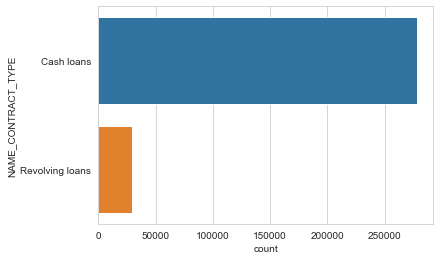

----------------------------------- CODE_GENDER -----------------------------------



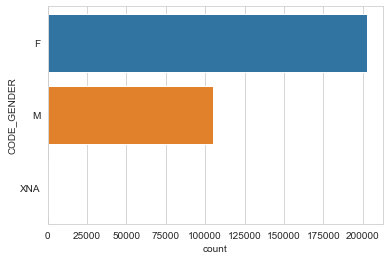

----------------------------------- FLAG_OWN_CAR -----------------------------------



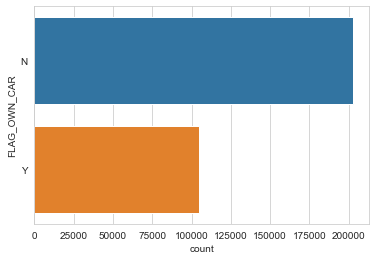

----------------------------------- FLAG_OWN_REALTY -----------------------------------



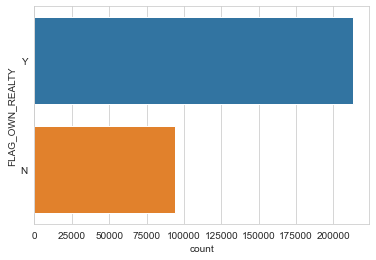

----------------------------------- NAME_TYPE_SUITE -----------------------------------



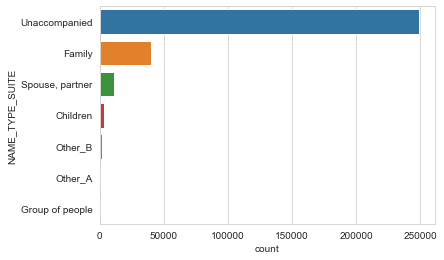

----------------------------------- NAME_INCOME_TYPE -----------------------------------



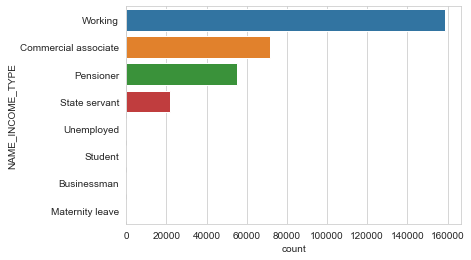

----------------------------------- NAME_EDUCATION_TYPE -----------------------------------



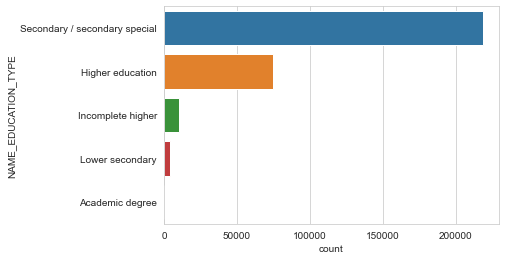

----------------------------------- NAME_FAMILY_STATUS -----------------------------------



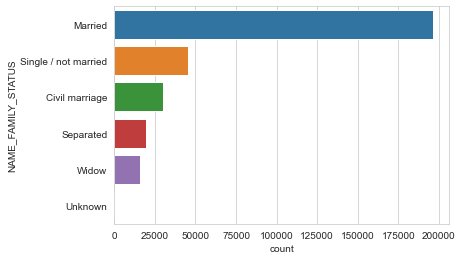

----------------------------------- NAME_HOUSING_TYPE -----------------------------------



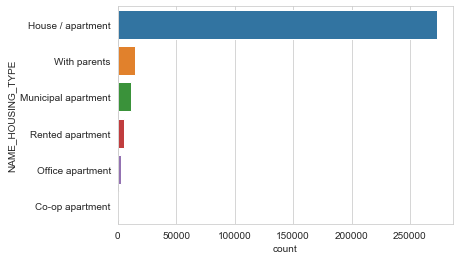

----------------------------------- OCCUPATION_TYPE -----------------------------------



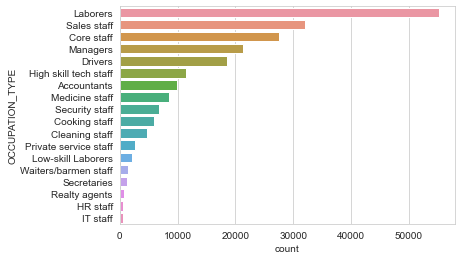

----------------------------------- WEEKDAY_APPR_PROCESS_START -----------------------------------



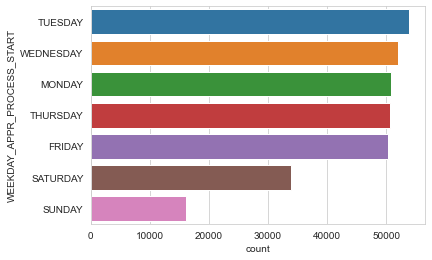

----------------------------------- ORGANIZATION_TYPE -----------------------------------



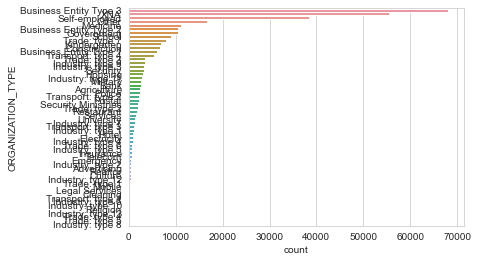

In [82]:
for i in range(len(col_names_cat)):
    view_cat(categorical_train, col_names_cat[i])

In [83]:
categorical_train['CODE_GENDER'] = categorical_train['CODE_GENDER'].replace("XNA","Unknown")
categorical_train['CODE_GENDER'].value_counts()

F          202448
M          105059
Unknown         4
Name: CODE_GENDER, dtype: int64

In [84]:
categorical_test['CODE_GENDER'] = categorical_test['CODE_GENDER'].replace("XNA","Unknown")
categorical_test['CODE_GENDER'].value_counts()

F    32678
M    16066
Name: CODE_GENDER, dtype: int64

In [85]:
print("The number of ORGANIZATION_TYPE unique values = {}\n".format(len(categorical_train['ORGANIZATION_TYPE'].unique())))
print(train_new['ORGANIZATION_TYPE'].value_counts().sort_values(ascending=False))

The number of ORGANIZATION_TYPE unique values = 58

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University          

We'll **replace the missing values** in categorical columns with their respective **mode**.

In [86]:
def replace_mode(df, col):
    df[col] = df[col].fillna(df[col].mode()[0])
    print("NaNs in {} are replaced with {}".format(col, df[col].mode()[0]))

In [87]:
print("Train data categorical columns with missing values:\n")
for i in range(len(col_names_cat)):
    replace_mode(categorical_train, col_names_cat[i])

print("\n----------------------------------------------------------------------\n")

print("Test data categorical columns with missing values:\n")
for i in range(len(col_names_cat)):
    replace_mode(categorical_test, col_names_cat[i])

Train data categorical columns with missing values:

NaNs in NAME_CONTRACT_TYPE are replaced with Cash loans
NaNs in CODE_GENDER are replaced with F
NaNs in FLAG_OWN_CAR are replaced with N
NaNs in FLAG_OWN_REALTY are replaced with Y
NaNs in NAME_TYPE_SUITE are replaced with Unaccompanied
NaNs in NAME_INCOME_TYPE are replaced with Working
NaNs in NAME_EDUCATION_TYPE are replaced with Secondary / secondary special
NaNs in NAME_FAMILY_STATUS are replaced with Married
NaNs in NAME_HOUSING_TYPE are replaced with House / apartment
NaNs in OCCUPATION_TYPE are replaced with Laborers
NaNs in WEEKDAY_APPR_PROCESS_START are replaced with TUESDAY
NaNs in ORGANIZATION_TYPE are replaced with Business Entity Type 3

----------------------------------------------------------------------

Test data categorical columns with missing values:

NaNs in NAME_CONTRACT_TYPE are replaced with Cash loans
NaNs in CODE_GENDER are replaced with F
NaNs in FLAG_OWN_CAR are replaced with N
NaNs in FLAG_OWN_REALTY are

In [88]:
categorical_train.isnull().sum().sort_values(ascending=False)

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
dtype: int64

In [89]:
categorical_test.isnull().sum().sort_values(ascending=False)

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
dtype: int64

The missing values of categorical columns of both train and test datasets **have now been handled**.

#### Label Encode the Categorical Variables

Encoding categorical data is a process of **converting categorical data into integer format** so that the data with converted categorical values can be provided to the models to give and improve the predictions. **Each label is assigned a unique integer based on alphabetical ordering** with label encoding. We won't use the one-hot encoder because it will make the number of train and test data columns different, most likely due to the different number of categories of each column in train and test data.

In [90]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
categorical_train_le = categorical_train.apply(lambda col_names_cat: le.fit_transform(col_names_cat)) 
categorical_test_le = categorical_test.apply(lambda col_names_cat: le.fit_transform(col_names_cat)) 

In [91]:
categorical_train_le.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,0,1,0,1,6,7,4,3,1,8,6,5
1,0,0,0,0,1,4,1,1,1,3,1,39
2,1,1,1,1,6,7,4,3,1,8,1,11
3,0,0,0,1,6,7,4,0,1,8,6,5
4,0,1,0,1,6,7,4,3,1,3,4,37


In [92]:
categorical_test_le.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,0,0,0,1,6,6,1,1,1,8,5,28
1,0,1,0,1,6,6,4,1,1,9,0,42
2,0,1,1,1,6,6,1,1,1,4,1,54
3,0,0,0,1,6,6,4,1,1,14,6,5
4,0,1,1,0,6,6,4,1,1,8,0,5


In [93]:
print("Train data categorical columns:",categorical_train_le.shape)
print("Test data categorical columns:",categorical_test_le.shape)

Train data categorical columns: (307511, 12)
Test data categorical columns: (48744, 12)


#### Duplicated Values

In [94]:
print("Number of duplicated values in train data:",train_new.loc[train.duplicated()].shape[0])
print("Number of duplicated values in test data:",test_new.loc[test.duplicated()].shape[0])

Number of duplicated values in train data: 0
Number of duplicated values in test data: 0


The data has **no duplicated values**.

#### Standardize the Numerical Variables

Data standardization is the process of **rescaling the attributes so that they have mean as 0 and variance as 1**. The ultimate goal to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values.

We'll only apply standardization to numerical columns and not the other encoded features (categorical columns). Standardizing the encoded features would mean assigning a distribution to categorical features. We don't want to do that!

In [95]:
num_cols_train = [col for col in numeric_train.columns.tolist()]
num_cols_train

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 

In [96]:
numeric_train_std = numeric_train.drop(['SK_ID_CURR','TARGET'], axis=1)

In [97]:
num_cols_train_std = [col for col in numeric_train_std.columns.tolist()]

In [98]:
num_cols_test = [col for col in numeric_test.columns.tolist()]
num_cols_test

['SK_ID_CURR',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'CNT_FAM_ME

In [99]:
numeric_test_std = numeric_test.drop(['SK_ID_CURR'], axis=1)

In [100]:
num_cols_test_std = [col for col in numeric_test_std.columns.tolist()]

In [101]:
pd.DataFrame(num_cols_train_std, num_cols_test_std)

,0
CNT_CHILDREN,CNT_CHILDREN
DAYS_BIRTH,DAYS_BIRTH
DAYS_EMPLOYED,DAYS_EMPLOYED
DAYS_ID_PUBLISH,DAYS_ID_PUBLISH
FLAG_MOBIL,FLAG_MOBIL
FLAG_EMP_PHONE,FLAG_EMP_PHONE
FLAG_WORK_PHONE,FLAG_WORK_PHONE
FLAG_CONT_MOBILE,FLAG_CONT_MOBILE
FLAG_PHONE,FLAG_PHONE
FLAG_EMAIL,FLAG_EMAIL


In [102]:
col = num_cols_train_std

In [103]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [104]:
numeric_train[col] = pd.DataFrame(ss.fit_transform(numeric_train[col]))
numeric_test[col] = pd.DataFrame(ss.transform(numeric_test[col]))

In [105]:
numeric_train.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,-0.577538,1.506880,-0.456215,0.579154,0.001803,0.468697,-0.499013,0.043245,1.599337,-0.245215,-0.103064,-0.062699,-0.631821,-0.124004,-0.231267,-0.205869,-0.291208,-0.547236,-0.467814,-0.006502,0.639065,-0.009017,-0.123882,-0.310738,-0.013853,-0.297632,-0.062538,-0.004771,-0.062669,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305,0.142129,-0.478095,-0.166143,-0.507236,-0.149452,0.379837,-1.265722,-1.317940,-2.153651,0.242861,4.163504,0.252132,5.253260,-0.206992,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-0.440926
1,100003,0,-0.577538,-0.166821,-0.460115,1.790855,0.001803,0.468697,-0.499013,0.043245,1.599337,-0.245215,-2.067573,-2.051813,-0.325620,-0.124004,-0.231267,-0.205869,-0.291208,-0.547236,-0.467814,-0.006502,0.639065,-0.009017,-0.123882,-0.310738,-0.013853,-0.297632,-0.062538,-0.004771,-0.062669,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305,0.426792,1.725450,0.592683,1.600873,-1.252750,1.078697,-0.167638,0.564482,0.112063,-0.174085,-0.320480,-0.168527,-0.275663,0.163107,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-1.007331
2,100004,0,-0.577538,-0.689509,-0.453299,0.306869,0.001803,0.468697,2.003956,0.043245,1.599337,-0.245215,-0.103064,-0.062699,-0.938022,-0.124004,-0.231267,-0.205869,-0.291208,-0.547236,-0.467814,-0.006502,-1.564786,-0.009017,-0.123882,-0.310738,-0.013853,-0.297632,-0.062538,-0.004771,-0.062669,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305,-0.427196,-1.152888,-1.404669,-1.092145,-0.783451,0.206116,-1.265722,0.216948,1.223975,-0.591031,-0.320480,-0.589187,-0.275663,0.178831,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-1.007331
3,100006,0,-0.577538,-0.680114,-0.473217,0.369143,0.001803,0.468697,-0.499013,0.043245,-0.625259,-0.245215,-0.103064,-0.062699,1.511587,-0.124004,-0.231267,-0.205869,-0.291208,-0.547236,-0.467814,-0.006502,0.639065,-0.009017,-0.123882,-0.310738,-0.013853,-0.297632,-0.062538,-0.004771,-0.062669,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305,-0.142533,-0.711430,0.177874,-0.653463,-0.928991,-1.375829,-0.167638,0.712205,0.112063,0.242861,-0.320480,0.252132,-0.275663,0.418306,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-0.440926
4,100007,0,-0.577538,-0.892535,-0.473210,-0.307263,0.001803,0.468697,-0.499013,0.043245,-0.625259,-0.245215,-0.103064,-0.062699,-0.325620,-0.124004,-0.231267,-0.205869,-0.291208,1.827367,2.137601,-0.006502,-1.564786,-0.009017,-0.123882,-0.310738,-0.013853,3.359858,-0.062538,-0.004771,-0.062669,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305,-0.199466,-0.213734,-0.361749,-0.068554,0.563570,0.191639,-1.265722,-1.004691,0.112063,-0.591031,-0.320480,-0.589187,-0.275

In [106]:
numeric_test.head()

,SK_ID_CURR,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,-0.577538,-0.734193,-0.468192,1.445696,0.001803,0.468697,-0.499013,0.043245,-0.625259,4.078050,-0.103064,-0.062699,1.817788,-0.124004,-0.231267,-0.205869,-0.291208,-0.547236,-0.467814,-0.006502,0.639065,-0.009017,-0.123882,-0.310738,-0.013853,-0.297632,-0.062538,-0.004771,-0.062669,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305,-0.142533,-0.075097,-0.451790,-0.239153,-0.145910,-0.052196,-0.167638,1.441565,-2.038369,-0.591031,-0.32048,-0.589187,-0.275663,-0.939933,-0.070987,-0.058766,-0.155837,-0.269947,-0.308620,-1.007331
1,100005,-0.577538,-0.464485,-0.483339,0.908413,0.001803,0.468697,-0.499013,0.043245,-0.625259,-0.245215,-0.103064,-0.062699,-0.938022,-0.124004,-0.231267,-0.205869,-0.291208,-0.547236,-0.467814,-0.006502,0.639065,-0.009017,-0.123882,-0.310738,-0.013853,-0.297632,-0.062538,-0.004771,-0.062669,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305,-0.294354,-0.934825,-0.671924,-0.970289,1.078997,-1.172870,-0.167638,-1.167540,-0.473477,-0.591031,-0.32048,-0.589187,-0.275663,1.164552,-0.070987,-0.058766,-0.155837,-0.269947,-0.308620,0.691885
2,100013,-0.577538,-0.916824,-0.483262,-0.337075,0.001803,0.468697,-0.499013,0.043245,-0.625259,-0.245215,-0.103064,-0.062699,0.592983,-0.124004,-0.231267,-0.205869,-0.291208,-0.547236,-0.467814,-0.006502,-1.564786,-0.009017,-0.123882,-0.310738,-0.013853,3.359858,-0.062538,-0.004771,-0.062669,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305,0.142129,0.159601,2.943988,0.248271,-0.127762,0.797961,-0.167638,0.970733,0.545375,-0.591031,-0.32048,-0.589187,-0.275663,0.129242,-0.070987,-0.058766,-0.155837,-0.269947,1.035362,1.258290
3,100028,2.192084,0.472274,-0.464915,-0.804133,0.001803,0.468697,-0.499013,0.043245,1.599337,-0.245215,-0.103064,-0.062699,-0.325620,-0.124004,-0.231267,-0.205869,-0.291208,-0.547236,-0.467814,-0.006502,0.639065,-0.009017,-0.123882,-0.310738,-0.013853,-0.297632,-0.062538,-0.004771,-0.062669,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305,0.616567,2.424840,1.511720,2.807247,0.399377,0.847636,2.028529,-0.025286,0.555178,-0.591031,-0.32048,-0.589187,-0.275663,-1.018548,-0.070987,-0.058766,-0.155837,-0.269947,-0.308620,0.691885
4,100038,0.807273,0.686757,-0.467215,-0.839908,0.001803,0.468697,2.003956,0.043245,-0.625259,-0.245215,-0.103064,-0.062699,-2.162827,-0.124004,-0.231267,-0.205869,-0.291208,1.827367,2.137601,-0.006502,0.639065,-0.009017,-0.123882,-0.310738,-0.013853,-0.297632,-0.062538,-0.004771,-0.062669,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305,0.047242,0.065776,0.342121,0.236086,-0.783451,0.279919,0.930446,-0.465323,0.019472,-0.591031,-0.32048,-0.589187,-0.275663,0.171574,-0.070987,

We'll remove unnecessary column: `SK_ID_CURR`

In [107]:
numeric_train_std = numeric_train.drop('SK_ID_CURR', axis=1)
numeric_train_std.head()

,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,-0.577538,1.506880,-0.456215,0.579154,0.001803,0.468697,-0.499013,0.043245,1.599337,-0.245215,-0.103064,-0.062699,-0.631821,-0.124004,-0.231267,-0.205869,-0.291208,-0.547236,-0.467814,-0.006502,0.639065,-0.009017,-0.123882,-0.310738,-0.013853,-0.297632,-0.062538,-0.004771,-0.062669,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305,0.142129,-0.478095,-0.166143,-0.507236,-0.149452,0.379837,-1.265722,-1.317940,-2.153651,0.242861,4.163504,0.252132,5.253260,-0.206992,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-0.440926
1,0,-0.577538,-0.166821,-0.460115,1.790855,0.001803,0.468697,-0.499013,0.043245,1.599337,-0.245215,-2.067573,-2.051813,-0.325620,-0.124004,-0.231267,-0.205869,-0.291208,-0.547236,-0.467814,-0.006502,0.639065,-0.009017,-0.123882,-0.310738,-0.013853,-0.297632,-0.062538,-0.004771,-0.062669,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305,0.426792,1.725450,0.592683,1.600873,-1.252750,1.078697,-0.167638,0.564482,0.112063,-0.174085,-0.320480,-0.168527,-0.275663,0.163107,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-1.007331
2,0,-0.577538,-0.689509,-0.453299,0.306869,0.001803,0.468697,2.003956,0.043245,1.599337,-0.245215,-0.103064,-0.062699,-0.938022,-0.124004,-0.231267,-0.205869,-0.291208,-0.547236,-0.467814,-0.006502,-1.564786,-0.009017,-0.123882,-0.310738,-0.013853,-0.297632,-0.062538,-0.004771,-0.062669,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305,-0.427196,-1.152888,-1.404669,-1.092145,-0.783451,0.206116,-1.265722,0.216948,1.223975,-0.591031,-0.320480,-0.589187,-0.275663,0.178831,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-1.007331
3,0,-0.577538,-0.680114,-0.473217,0.369143,0.001803,0.468697,-0.499013,0.043245,-0.625259,-0.245215,-0.103064,-0.062699,1.511587,-0.124004,-0.231267,-0.205869,-0.291208,-0.547236,-0.467814,-0.006502,0.639065,-0.009017,-0.123882,-0.310738,-0.013853,-0.297632,-0.062538,-0.004771,-0.062669,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305,-0.142533,-0.711430,0.177874,-0.653463,-0.928991,-1.375829,-0.167638,0.712205,0.112063,0.242861,-0.320480,0.252132,-0.275663,0.418306,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-0.440926
4,0,-0.577538,-0.892535,-0.473210,-0.307263,0.001803,0.468697,-0.499013,0.043245,-0.625259,-0.245215,-0.103064,-0.062699,-0.325620,-0.124004,-0.231267,-0.205869,-0.291208,1.827367,2.137601,-0.006502,-1.564786,-0.009017,-0.123882,-0.310738,-0.013853,3.359858,-0.062538,-0.004771,-0.062669,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305,-0.199466,-0.213734,-0.361749,-0.068554,0.563570,0.191639,-1.265722,-1.004691,0.112063,-0.591031,-0.320480,-0.589187,-0.275663,-0.173126,-0.070987,-0.058766,-0.155837,-0

In [108]:
numeric_test_std = numeric_test.drop('SK_ID_CURR', axis=1)
numeric_test_std.head()

,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,-0.577538,-0.734193,-0.468192,1.445696,0.001803,0.468697,-0.499013,0.043245,-0.625259,4.078050,-0.103064,-0.062699,1.817788,-0.124004,-0.231267,-0.205869,-0.291208,-0.547236,-0.467814,-0.006502,0.639065,-0.009017,-0.123882,-0.310738,-0.013853,-0.297632,-0.062538,-0.004771,-0.062669,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305,-0.142533,-0.075097,-0.451790,-0.239153,-0.145910,-0.052196,-0.167638,1.441565,-2.038369,-0.591031,-0.32048,-0.589187,-0.275663,-0.939933,-0.070987,-0.058766,-0.155837,-0.269947,-0.308620,-1.007331
1,-0.577538,-0.464485,-0.483339,0.908413,0.001803,0.468697,-0.499013,0.043245,-0.625259,-0.245215,-0.103064,-0.062699,-0.938022,-0.124004,-0.231267,-0.205869,-0.291208,-0.547236,-0.467814,-0.006502,0.639065,-0.009017,-0.123882,-0.310738,-0.013853,-0.297632,-0.062538,-0.004771,-0.062669,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305,-0.294354,-0.934825,-0.671924,-0.970289,1.078997,-1.172870,-0.167638,-1.167540,-0.473477,-0.591031,-0.32048,-0.589187,-0.275663,1.164552,-0.070987,-0.058766,-0.155837,-0.269947,-0.308620,0.691885
2,-0.577538,-0.916824,-0.483262,-0.337075,0.001803,0.468697,-0.499013,0.043245,-0.625259,-0.245215,-0.103064,-0.062699,0.592983,-0.124004,-0.231267,-0.205869,-0.291208,-0.547236,-0.467814,-0.006502,-1.564786,-0.009017,-0.123882,-0.310738,-0.013853,3.359858,-0.062538,-0.004771,-0.062669,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305,0.142129,0.159601,2.943988,0.248271,-0.127762,0.797961,-0.167638,0.970733,0.545375,-0.591031,-0.32048,-0.589187,-0.275663,0.129242,-0.070987,-0.058766,-0.155837,-0.269947,1.035362,1.258290
3,2.192084,0.472274,-0.464915,-0.804133,0.001803,0.468697,-0.499013,0.043245,1.599337,-0.245215,-0.103064,-0.062699,-0.325620,-0.124004,-0.231267,-0.205869,-0.291208,-0.547236,-0.467814,-0.006502,0.639065,-0.009017,-0.123882,-0.310738,-0.013853,-0.297632,-0.062538,-0.004771,-0.062669,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305,0.616567,2.424840,1.511720,2.807247,0.399377,0.847636,2.028529,-0.025286,0.555178,-0.591031,-0.32048,-0.589187,-0.275663,-1.018548,-0.070987,-0.058766,-0.155837,-0.269947,-0.308620,0.691885
4,0.807273,0.686757,-0.467215,-0.839908,0.001803,0.468697,2.003956,0.043245,-0.625259,-0.245215,-0.103064,-0.062699,-2.162827,-0.124004,-0.231267,-0.205869,-0.291208,1.827367,2.137601,-0.006502,0.639065,-0.009017,-0.123882,-0.310738,-0.013853,-0.297632,-0.062538,-0.004771,-0.062669,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305,0.047242,0.065776,0.342121,0.236086,-0.783451,0.279919,0.930446,-0.465323,0.019472,-0.591031,-0.32048,-0.589187,-0.275663,0.171574,-0.070987,-0.058766,-0.155837,-0.269947,-0.308620,0.1254

#### Merge Data after Encoding and Standardizing

In [109]:
# merge to new df 
train_df = pd.concat([numeric_train_std, categorical_train_le], axis=1)
test_df = pd.concat([numeric_test_std, categorical_test_le], axis=1)

In [110]:
print('Pre-processed train data shape (without ID):',train_df.shape)
print('Pre-processed test data shape (without ID):',test_df.shape)

Pre-processed train data shape (without ID): (307511, 72)
Pre-processed test data shape (without ID): (48744, 71)


#### Feature Selection using SelectKBest Method

The higher the feature score, the more likely that feature gets chosen for modeling.

In [111]:
X = train_df.drop(['TARGET'],axis=1)
y = train_df['TARGET']

In [112]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif 
bestFeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestFeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores.sort_values(by='Score', ascending=False).head(10)

,Specs,Score
46,EXT_SOURCE_2,8109.633923
47,EXT_SOURCE_3,7659.288339
1,DAYS_BIRTH,1893.976087
11,REGION_RATING_CLIENT_W_CITY,1144.461405
10,REGION_RATING_CLIENT,1070.491250
52,DAYS_LAST_PHONE_CHANGE,940.478790
65,NAME_EDUCATION_TYPE,922.808544
60,CODE_GENDER,922.594003
3,DAYS_ID_PUBLISH,816.396507
17,REG_CITY_NOT_WORK_CITY,801.742167


```
# for feature engineering (data numeric, non-negative using chi2)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 
bestFeatures = SelectKBest(score_func=chi2, k=10)
fit = bestFeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores
```

#### Feature Selection using ExtraTreesClassifier Method

The ExtraTreesClassifier method will help to give the
importance of each independent feature with a dependent feature.
Feature importance will give a score for each feature of the data;
the higher the score, the more important or relevant the feature to the output/target variable.

In [113]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier()
et.fit(X, y)
print(et.feature_importances_)

[1.89998858e-02 3.81607380e-02 3.13470890e-02 3.74586993e-02
 4.95577313e-08 1.28532463e-03 1.22341645e-02 5.16406103e-04
 1.33835667e-02 7.58338721e-03 8.63937117e-03 8.66206026e-03
 3.53128359e-02 1.83434360e-03 4.09001316e-03 3.58394458e-03
 4.94384008e-03 5.57915672e-03 5.96019930e-03 1.02932474e-04
 6.81163163e-03 7.00171502e-07 2.31723093e-03 2.48105906e-03
 5.00399877e-05 3.94380373e-03 7.82199170e-04 1.46009411e-07
 5.56298329e-04 1.03727242e-08 3.89752226e-04 3.82705888e-04
 1.93441168e-04 1.49416838e-03 5.11947261e-05 1.44153764e-03
 2.20079520e-04 1.94830142e-04 1.81748780e-04 3.52758747e-02
 3.45568930e-02 3.47069598e-02 3.35768429e-02 3.49747039e-02
 3.66814667e-02 2.33833667e-02 5.57883126e-02 5.32636370e-02
 2.59223276e-02 1.24036458e-02 2.58119100e-02 1.00694728e-02
 3.62485704e-02 1.58815916e-03 1.79628710e-03 5.58279726e-03
 1.54092119e-02 1.63555913e-02 3.16734446e-02 3.52896911e-03
 9.93893444e-03 1.17838317e-02 1.69052342e-02 1.72797220e-02
 1.37154959e-02 1.367350

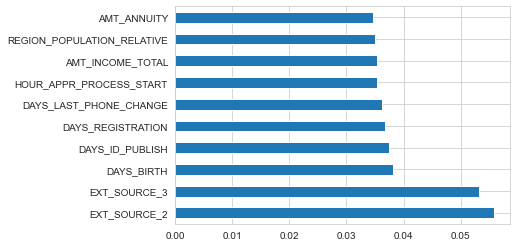

In [114]:
fimp = pd.Series(et.feature_importances_, index=X.columns)
fimp.nlargest(10).plot(kind='barh')
plt.show()

The two methods done: *SelectKBest* and *ExtraTreesClassifier*, both results in the variables `EXT_SOURCE_2`, `EXT_SOURCE_3`, and `DAYS_BIRTH` being the most important features to model `TARGET`

If we look at the `HomeCredit_columns_description.csv` file, the `EXT_SOURCE` variables are normalized score from external data source and `DAYS_BIRTH` is client's age in days at the time of application. This means that **the external data source and the client's age play important roles in modeling** the target variable in this analysis.

---
## **4 & 5. Modeling and Evaluation**

After going through the business understanding, data understanding, and data preparation, the next step is modeling and evaluation. The predictive model we'll create is the **Logistic Regression, K-Nearest Neighbor (KNN), and Random Forest** and the evaluation of the models created is by analyzing the key metrics as follows.

<center><img src="https://i.postimg.cc/qqxbPxFf/how-to-compute-accuracy-precision-recall-and-f1-score-in-machine-learning.png"></center>

[Source](https://www.tutorialexample.com/an-introduction-to-accuracy-precision-recall-f1-score-in-machine-learning-machine-learning-tutorial/)

F-score might be a better measure to use if seeking a balance between Precision and Recall is needed and there is an uneven class distribution (large number of Actual Negatives).

[Source](https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9)

AUC-ROC curve is also observed. AUC-ROC curve is a performance measurement for classification problems at various threshold settings. ROC (Receiver Operating Characteristics) is a probability curve and AUC (Area Under the Curve) represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. The higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. 

[Source](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)

To ease the model interpretation, feature importance is also observed. A higher score means that the specific feature will have a larger effect on the model that is being used to predict a certain variable.

[Source](https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285)

### Variables Definition

The features are separated into X and Y variables. In this case, `TARGET` is the Y variable since it is the one to be predicted by the model, while the rest are assigned as X variables.

In [115]:
train_df.head()

,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,1,-0.577538,1.506880,-0.456215,0.579154,0.001803,0.468697,-0.499013,0.043245,1.599337,-0.245215,-0.103064,-0.062699,-0.631821,-0.124004,-0.231267,-0.205869,-0.291208,-0.547236,-0.467814,-0.006502,0.639065,-0.009017,-0.123882,-0.310738,-0.013853,-0.297632,-0.062538,-0.004771,-0.062669,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305,0.142129,-0.478095,-0.166143,-0.507236,-0.149452,0.379837,-1.265722,-1.317940,-2.153651,0.242861,4.163504,0.252132,5.253260,-0.206992,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-0.440926,0,1,0,1,6,7,4,3,1,8,6,5
1,0,-0.577538,-0.166821,-0.460115,1.790855,0.001803,0.468697,-0.499013,0.043245,1.599337,-0.245215,-2.067573,-2.051813,-0.325620,-0.124004,-0.231267,-0.205869,-0.291208,-0.547236,-0.467814,-0.006502,0.639065,-0.009017,-0.123882,-0.310738,-0.013853,-0.297632,-0.062538,-0.004771,-0.062669,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305,0.426792,1.725450,0.592683,1.600873,-1.252750,1.078697,-0.167638,0.564482,0.112063,-0.174085,-0.320480,-0.168527,-0.275663,0.163107,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-1.007331,0,0,0,0,1,4,1,1,1,3,1,39
2,0,-0.577538,-0.689509,-0.453299,0.306869,0.001803,0.468697,2.003956,0.043245,1.599337,-0.245215,-0.103064,-0.062699,-0.938022,-0.124004,-0.231267,-0.205869,-0.291208,-0.547236,-0.467814,-0.006502,-1.564786,-0.009017,-0.123882,-0.310738,-0.013853,-0.297632,-0.062538,-0.004771,-0.062669,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305,-0.427196,-1.152888,-1.404669,-1.092145,-0.783451,0.206116,-1.265722,0.216948,1.223975,-0.591031,-0.320480,-0.589187,-0.275663,0.178831,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-1.007331,1,1,1,1,6,7,4,3,1,8,1,11
3,0,-0.577538,-0.680114,-0.473217,0.369143,0.001803,0.468697,-0.499013,0.043245,-0.625259,-0.245215,-0.103064,-0.062699,1.511587,-0.124004,-0.231267,-0.205869,-0.291208,-0.547236,-0.467814,-0.006502,0.639065,-0.009017,-0.123882,-0.310738,-0.013853,-0.297632,-0.062538,-0.004771,-0.062669,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305,-0.142533,-0.711430,0.177874,-0.653463,-0.928991,-1.375829,-0.167638,0.712205,0.112063,0.242861,-0.320480,0.252132,-0.275663,0.418306,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-0.440926,0,0,0,1,6,7,4,0,1,8,6,5
4,0,-0.577538,-0.892535,-0.473210,-0.307263,0.001803,0.468697,-0.499013,0.043245,-0.625259,-0.245215,-0.103064,-0.062699,-0.325620,-0.124004,-0.231267,-0.205869,-0.291208,1.827367,2.137601,-0.006502,-1.564786,-0.009017,-0.123882,-0.310738,-0.01385

In [116]:
test_df.head()

,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,-0.577538,-0.734193,-0.468192,1.445696,0.001803,0.468697,-0.499013,0.043245,-0.625259,4.078050,-0.103064,-0.062699,1.817788,-0.124004,-0.231267,-0.205869,-0.291208,-0.547236,-0.467814,-0.006502,0.639065,-0.009017,-0.123882,-0.310738,-0.013853,-0.297632,-0.062538,-0.004771,-0.062669,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305,-0.142533,-0.075097,-0.451790,-0.239153,-0.145910,-0.052196,-0.167638,1.441565,-2.038369,-0.591031,-0.32048,-0.589187,-0.275663,-0.939933,-0.070987,-0.058766,-0.155837,-0.269947,-0.308620,-1.007331,0,0,0,1,6,6,1,1,1,8,5,28
1,-0.577538,-0.464485,-0.483339,0.908413,0.001803,0.468697,-0.499013,0.043245,-0.625259,-0.245215,-0.103064,-0.062699,-0.938022,-0.124004,-0.231267,-0.205869,-0.291208,-0.547236,-0.467814,-0.006502,0.639065,-0.009017,-0.123882,-0.310738,-0.013853,-0.297632,-0.062538,-0.004771,-0.062669,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305,-0.294354,-0.934825,-0.671924,-0.970289,1.078997,-1.172870,-0.167638,-1.167540,-0.473477,-0.591031,-0.32048,-0.589187,-0.275663,1.164552,-0.070987,-0.058766,-0.155837,-0.269947,-0.308620,0.691885,0,1,0,1,6,6,4,1,1,9,0,42
2,-0.577538,-0.916824,-0.483262,-0.337075,0.001803,0.468697,-0.499013,0.043245,-0.625259,-0.245215,-0.103064,-0.062699,0.592983,-0.124004,-0.231267,-0.205869,-0.291208,-0.547236,-0.467814,-0.006502,-1.564786,-0.009017,-0.123882,-0.310738,-0.013853,3.359858,-0.062538,-0.004771,-0.062669,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305,0.142129,0.159601,2.943988,0.248271,-0.127762,0.797961,-0.167638,0.970733,0.545375,-0.591031,-0.32048,-0.589187,-0.275663,0.129242,-0.070987,-0.058766,-0.155837,-0.269947,1.035362,1.258290,0,1,1,1,6,6,1,1,1,4,1,54
3,2.192084,0.472274,-0.464915,-0.804133,0.001803,0.468697,-0.499013,0.043245,1.599337,-0.245215,-0.103064,-0.062699,-0.325620,-0.124004,-0.231267,-0.205869,-0.291208,-0.547236,-0.467814,-0.006502,0.639065,-0.009017,-0.123882,-0.310738,-0.013853,-0.297632,-0.062538,-0.004771,-0.062669,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305,0.616567,2.424840,1.511720,2.807247,0.399377,0.847636,2.028529,-0.025286,0.555178,-0.591031,-0.32048,-0.589187,-0.275663,-1.018548,-0.070987,-0.058766,-0.155837,-0.269947,-0.308620,0.691885,0,0,0,1,6,6,4,1,1,14,6,5
4,0.807273,0.686757,-0.467215,-0.839908,0.001803,0.468697,2.003956,0.043245,-0.625259,-0.245215,-0.103064,-0.062699,-2.162827,-0.124004,-0.231267,-0.205869,-0.291208,1.827367,2.137601,-0.006502,0.639065,-0.009017,-0.123882,-0.310738,-0.013853,-0.297632,-0.06

In [117]:
X_train = train_df.drop(columns='TARGET', axis=1)
y_train = train_df['TARGET']

test = test_df

In [118]:
print('The shape of X variable:', X_train.shape,
      '\nThe shape of y variable:', y_train.shape,
      '\nThe shape of test set:', test.shape)

The shape of X variable: (307511, 71) 
The shape of y variable: (307511,) 
The shape of test set: (48744, 71)


### Split Data

The data is splitted into 80% train set and 20% validation set while the test set is in `test_df`

In [119]:
# split data into train and validation set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=29)

In [120]:
print('The shape of X train set:', X_train.shape,
      '\nThe shape of X validation set:', X_val.shape,
      '\nThe shape of y train set:', y_train.shape,
      '\nThe shape of y validation set:', y_val.shape)

The shape of X train set: (246008, 71) 
The shape of X validation set: (61503, 71) 
The shape of y train set: (246008,) 
The shape of y validation set: (61503,)


### Imbalanced Data

Most machine learning algorithms work best when the number of samples in each class are about equal. This is because **most algorithms are designed to maximize accuracy and reduce errors**.

However, if the data set is imbalanced, then in such cases, we get a pretty high accuracy just by predicting the majority class, but we fail to capture the minority class, which is most often the point of creating the model in the first place.

[Source](https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/)

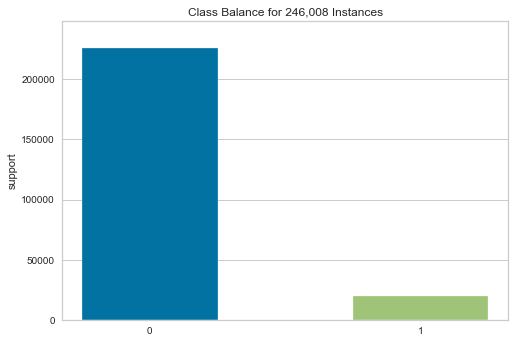

<AxesSubplot:title={'center':'Class Balance for 246,008 Instances'}, ylabel='support'>

In [121]:
# check if the target variable is balanced
from yellowbrick.target import ClassBalance
visualizer = ClassBalance()
visualizer.fit(y_train)
visualizer.show()

From the above chart, we can see that loans with payment difficulties (1) have very few observations, **this class imbalance can affect our model when training**. To solve this problem, we will **oversample the minority class**. Oversampling can be defined as adding more copies to the minority class.

In [122]:
# check imbalance data for training dataset
y_train.value_counts()

0    226045
1     19963
Name: TARGET, dtype: int64

In [123]:
# deal with imbalance data
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler()
X_train_s, y_train_s = os.fit_resample(X_train, y_train)
y_train_series = pd.Series(y_train_s)

In [124]:
# check value counts after oversampling
y_train_series.value_counts()

0    226045
1    226045
Name: TARGET, dtype: int64

### Model Creation

For this analysis, the loan status `TARGET` is our target variable. It is a categorical variable so the Logistic Regression can be used to build the model, but other models, such as K-Nearest Neighbor (KNN) and Random Forest models will be built as the comparison. In this case, the model is used to predict whether the loan has payment difficulties (1) or repaid (0).

In [125]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

### **Model 1 - Logistic Regression**

Logistic Regression is used when the target variable is categorical. When there are only 2 categories, it is called binomial logistic regression ([source](https://medium.com/data-science-group-iitr/logistic-regression-simplified-9b4efe801389)).

In [126]:
# run logistic regression model
lr_model = LogisticRegression(random_state=29)
lr_model.fit(X_train_s, y_train_s)

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=29)

In [127]:
# predict y (target)
y_pred_lr = lr_model.predict(X_val)

              precision    recall  f1-score   support

           0       0.96      0.69      0.80     56641
           1       0.16      0.67      0.25      4862

    accuracy                           0.69     61503
   macro avg       0.56      0.68      0.53     61503
weighted avg       0.90      0.69      0.76     61503

Accuracy: 0.6857063883062615
Precision: 0.15535969509290137
Recall: 0.6707116412998766
F1-score: 0.25228222187838467


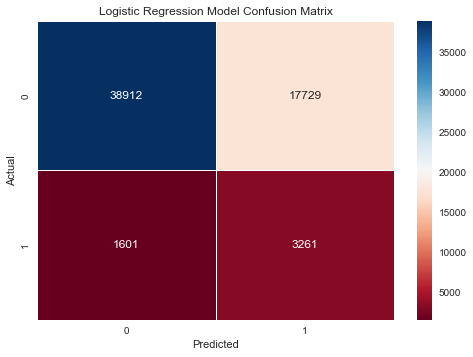

In [128]:
# model evaluation
cnf_matrix = confusion_matrix(y_val, y_pred_lr)
print(classification_report(y_val, y_pred_lr))
sns.heatmap(cnf_matrix, cmap='RdBu', annot=True, linewidth=0.5, fmt='d')
plt.title('Logistic Regression Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# evaluation scores
print("Accuracy:", metrics.accuracy_score(y_val, y_pred_lr))
print("Precision:", metrics.precision_score(y_val, y_pred_lr))
print("Recall:", metrics.recall_score(y_val, y_pred_lr))
print("F1-score:", metrics.f1_score(y_val, y_pred_lr))

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


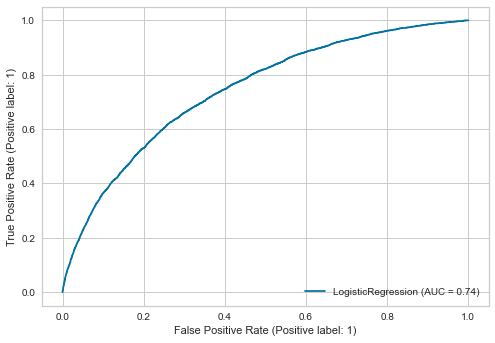

In [129]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(lr_model, X_val, y_val)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'AMT_CREDIT'),
  Text(1, 0, 'CODE_GENDER'),
  Text(2, 0, 'CNT_CHILDREN'),
  Text(3, 0, 'FLAG_DOCUMENT_3'),
  Text(4, 0, 'NAME_EDUCATION_TYPE'),
  Text(5, 0, 'REGION_RATING_CLIENT_W_CITY'),
  Text(6, 0, 'AMT_ANNUITY'),
  Text(7, 0, 'DAYS_BIRTH'),
  Text(8, 0, 'FLAG_DOCUMENT_6'),
  Text(9, 0, 'DAYS_ID_PUBLISH')])

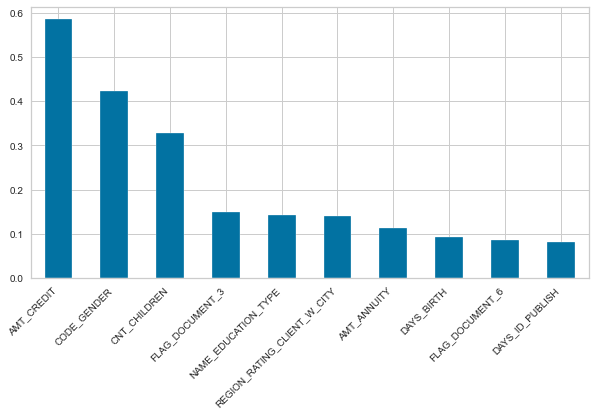

In [130]:
# feature importance
lr_weights = pd.Series(lr_model.coef_[0], index=X_train_s.columns.values)

plt.figure(figsize=(10,5))
lr_weights.sort_values(ascending=False).head(10).plot(kind='bar')
plt.xticks(rotation=45, ha='right')

### **Model 2 - K-Nearest Neighbor**

K-Nearest Neighbor is a simple algorithm that stores all the available cases and classifies the new data or case based on a similarity measure ([source](https://medium.datadriveninvestor.com/k-nearest-neighbors-knn-algorithm-bd375d14eec7)).

In [131]:
# run k-nearest neighbor model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_s, y_train_s)

KNeighborsClassifier()

In [132]:
# predict y (target)
y_pred_knn = knn_model.predict(X_val)

              precision    recall  f1-score   support

           0       0.93      0.80      0.86     56641
           1       0.11      0.29      0.16      4862

    accuracy                           0.76     61503
   macro avg       0.52      0.55      0.51     61503
weighted avg       0.86      0.76      0.80     61503

Accuracy: 0.7602393379184755
Precision: 0.11214879924658609
Recall: 0.2939119703825586
F1-score: 0.16234946603044764


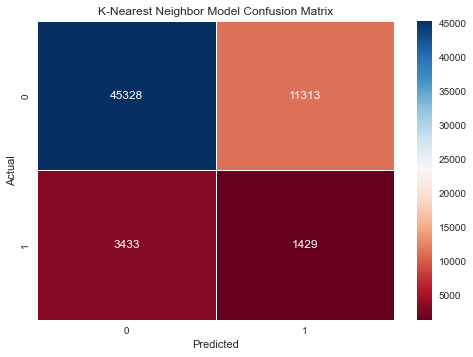

In [133]:
# model evaluation
cnf_matrix = confusion_matrix(y_val, y_pred_knn)
print(classification_report(y_val, y_pred_knn))
sns.heatmap(cnf_matrix, cmap='RdBu', annot=True, linewidth=0.5, fmt='d')
plt.title('K-Nearest Neighbor Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# evaluation scores
print("Accuracy:", metrics.accuracy_score(y_val, y_pred_knn))
print("Precision:", metrics.precision_score(y_val, y_pred_knn))
print("Recall:", metrics.recall_score(y_val, y_pred_knn))
print("F1-score:", metrics.f1_score(y_val, y_pred_knn))

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


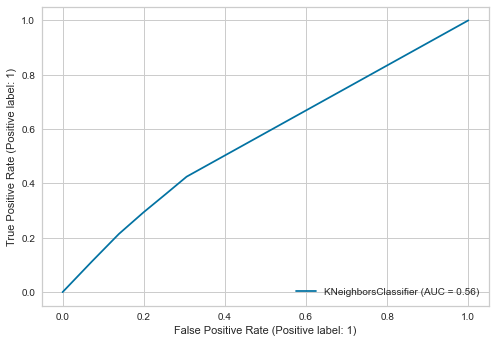

In [134]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(knn_model, X_val, y_val)

### **Model 3 - Random Forest**

Random forest uses a modified tree learning algorithm that inspects random subset of the features at each split in the learning process ([source](https://medium.com/@harshdeepsingh_35448/understanding-random-forests-aa0ccecdbbbb)).

In [135]:
# run random forest model
rf_model = RandomForestClassifier(random_state=29)
rf_model.fit(X_train_s, y_train_s)

RandomForestClassifier(random_state=29)

In [136]:
# predict y (target)
y_pred_rf = rf_model.predict(X_val)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56641
           1       0.47      0.01      0.02      4862

    accuracy                           0.92     61503
   macro avg       0.69      0.51      0.49     61503
weighted avg       0.89      0.92      0.88     61503

Accuracy: 0.9208168707217534
Precision: 0.4672131147540984
Recall: 0.011723570547099958
F1-score: 0.022873194221508828


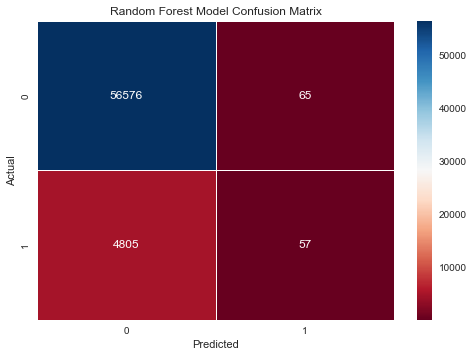

In [137]:
# model evaluation
cnf_matrix = confusion_matrix(y_val, y_pred_rf)
print(classification_report(y_val, y_pred_rf))
sns.heatmap(cnf_matrix, cmap='RdBu', annot=True, linewidth=0.5, fmt='d')
plt.title('Random Forest Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# evaluation scores
print("Accuracy:", metrics.accuracy_score(y_val, y_pred_rf))
print("Precision:", metrics.precision_score(y_val, y_pred_rf))
print("Recall:", metrics.recall_score(y_val, y_pred_rf))
print("F1-score:", metrics.f1_score(y_val, y_pred_rf))

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


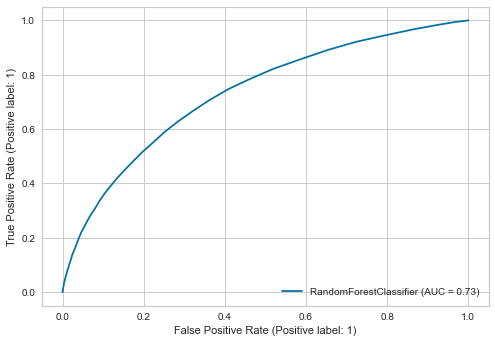

In [138]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(rf_model, X_val, y_val)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'EXT_SOURCE_2'),
  Text(1, 0, 'EXT_SOURCE_3'),
  Text(2, 0, 'DAYS_BIRTH'),
  Text(3, 0, 'DAYS_ID_PUBLISH'),
  Text(4, 0, 'DAYS_REGISTRATION'),
  Text(5, 0, 'AMT_ANNUITY'),
  Text(6, 0, 'DAYS_LAST_PHONE_CHANGE'),
  Text(7, 0, 'DAYS_EMPLOYED'),
  Text(8, 0, 'AMT_CREDIT'),
  Text(9, 0, 'AMT_GOODS_PRICE')])

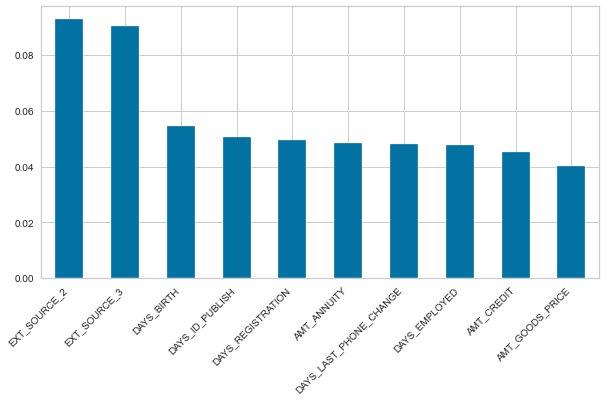

In [139]:
# feature importance
rf_weights = pd.Series(rf_model.feature_importances_, index=X_train_s.columns.values)

plt.figure(figsize=(10,5))
rf_weights.sort_values(ascending=False).head(10).plot(kind='bar')
plt.xticks(rotation=45, ha='right')

```
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

for i in range(2,10):
    rfe = RFE(estimator=RandomForestClassifier(),n_features_to_select=i, verbose=0)
    rfe.fit(X_train_s, y_train_s)
    print(f"Accuracy with Feature {i} ==>",metrics.accuracy_score(y_val, rfe.predict(X_val)))
```

In [140]:
X_train_rf_fe = X_train_s[['EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','DAYS_ID_PUBLISH','DAYS_REGISTRATION',
                           'AMT_ANNUITY','DAYS_LAST_PHONE_CHANGE','DAYS_EMPLOYED','AMT_CREDIT','AMT_GOODS_PRICE']]
X_val_rf_fe = X_val[['EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','DAYS_ID_PUBLISH','DAYS_REGISTRATION',
                           'AMT_ANNUITY','DAYS_LAST_PHONE_CHANGE','DAYS_EMPLOYED','AMT_CREDIT','AMT_GOODS_PRICE']]

In [141]:
rf_model_fe = RandomForestClassifier(random_state=29)
rf_model_fe.fit(X_train_rf_fe, y_train_s)

RandomForestClassifier(random_state=29)

In [142]:
# predict y (target)
y_pred_rf_fe = rf_model_fe.predict(X_val_rf_fe)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56641
           1       0.39      0.03      0.06      4862

    accuracy                           0.92     61503
   macro avg       0.66      0.52      0.51     61503
weighted avg       0.88      0.92      0.89     61503

Accuracy: 0.9194023055785897
Precision: 0.39080459770114945
Recall: 0.03496503496503497
F1-score: 0.06418727581649991


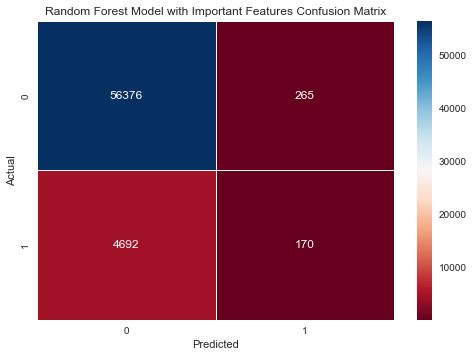

In [143]:
# model evaluation
cnf_matrix = confusion_matrix(y_val, y_pred_rf_fe)
print(classification_report(y_val, y_pred_rf_fe))
sns.heatmap(cnf_matrix, cmap='RdBu', annot=True, linewidth=0.5, fmt='d')
plt.title('Random Forest Model with Important Features Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# evaluation scores
print("Accuracy:", metrics.accuracy_score(y_val, y_pred_rf_fe))
print("Precision:", metrics.precision_score(y_val, y_pred_rf_fe))
print("Recall:", metrics.recall_score(y_val, y_pred_rf_fe))
print("F1-score:", metrics.f1_score(y_val, y_pred_rf_fe))

/Applications/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


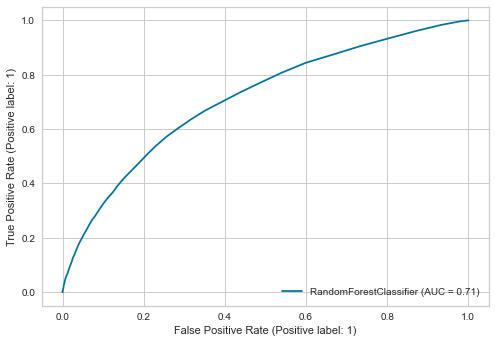

In [144]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(rf_model_fe, X_val_rf_fe, y_val)

Using only important features in random forest model turns out to lower the AUC value.

### Hyperparameter Tuning - K-Nearest Neighbor & Random Forest

Hyper-parameter tuning is an **optimization** loop on top of ML model learning to find the set of hyper-parameters leading to **the lowest error on the validation set** ([source](https://medium.com/criteo-engineering/hyper-parameter-optimization-algorithms-2fe447525903)).

* **Grid Search**. Grid search is arguably the most basic hyperparameter tuning method.
With this technique, we simply build a model for each possible
combination of all of the hyperparameter values provided, evaluating
each model, and selecting the architecture which produces the best
results.
* **Random Search**. Random search differs from grid search in that we longer provide a
discrete set of values to explore for each hyperparameter; rather, we
provide a statistical distribution for each hyperparameter from which
values may be randomly sampled. We'll define a sampling distribution
for each hyperparameter.

```
# import libraries
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
```

#### K-Nearest Neighbor - Grid Search

```
# k-nearest neighbor model
param_grid = {'n_neighbors':[5,10,15,25,30,50]}
grid_knn = GridSearchCV(knn_model, param_grid, scoring='accuracy', refit=True)
```

```
grid_knn.fit(X_train_s, y_train_s)
print("Best Score ==>", grid_knn.best_score_)
print("Tuned Parameters ==>",grid_knn.best_params_)
print("Accuracy on Train set ==>", grid_knn.score(X_train_s, y_train_s))
print("Accuracy on Validation set ==>", grid_knn.score(X_val, y_val))
```

#### Random Forest - Random Search

```
param_grid = {'n_estimators':[200,500,1000],
              'max_depth':[2,3,4,5],
              'min_samples_leaf':[0.2,0.4,0.6,0.8,1],
              'max_features':['auto','sqrt'],
              'criterion':['gini','entropy']}
grid_rf = RandomizedSearchCV(rfc, param_grid, n_iter=20, scoring='accuracy', refit=True)
```

```
grid_rfc.fit(X_train_s, y_train_s)
print("Best Score ==>", grid_rfc.best_score_)
print("Tuned Paramerers ==>",grid_rfc.best_params_)
print("Accuracy on Train set ==>", grid_rfc.score(X_train_s, y_train_s))
print("Accuracy on Validation set ==>", grid_rfc.score(X_val, y_val))
```

### Output

In [145]:
output = pd.DataFrame({'SK_ID_CURR': numeric_test.SK_ID_CURR, 
                       'TARGET': rf_model.predict_proba(test)[:,1]})
output.head()

,SK_ID_CURR,TARGET
0,100001,0.14
1,100005,0.17
2,100013,0.02
3,100028,0.08
4,100038,0.20


In [146]:
test.shape

(48744, 71)

In [147]:
output.shape

(48744, 2)

In [148]:
# save output to csv for submission
output.to_csv('submission.csv', index=False)

---
## **6. Conclusion**

Using the CRISP-DM methodology, we've gone through business understanding, data understanding, data preparation, modeling, and evaluation. Next, we'll conclude our analysis of the credit score case as follows.
* Unlocking the maximum potential of Home Credit Indonesia's data can be done by creating a model that ensures customers who can make repayments are not rejected when applying for loans. 
* From data exploration, it's found that far more loans are repaid on time (91,9%) than loans not repaid (8,1%). This indicates an imbalance in the target variable where the number of observations per target class is not equally distributed. This target variable's class imbalance could affect our model when training. Therefore, oversampling of the minority class was conducted.
* SelectKBest and ExtraTreesClassifier methods result in the variables EXT_SOURCE_2, EXT_SOURCE_3, and DAYS_BIRTH being the most important features to model TARGET.
* The random forest is the best out of the 3 models built with an accuracy of 0,92 and an AUC score of 0,73 (which is fairly good). The model still needs improvements using hyperparameter tuning to find the set of hyper-parameters leading to the lowest error on the validation set. However, this wasn't done due to memory issues.

## **References**
* [Investopedia](https://www.investopedia.com/terms/c/credit_score.asp)
* [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/)
* [Medium Published in Analytics Vidhya](https://medium.com/analytics-vidhya/why-it-makes-a-difference-how-to-standardize-training-and-test-set-e95bf350bed3)
* [Kaggle](https://www.kaggle.com/code/ravichaubey1506/machine-learning-predictive-modeling-analytics#KNN)